In [107]:
"""
STEP 0 — Define Modeling Framework
This step establishes the foundational parameters of the quantitative model.
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class ModelingFramework:
    """
    Defines the core framework for the quantitative model.
    
    The model follows the equation: R_{i,t+1} = α_t + Σ β_{i,j,t} f_{j,t} + ε_{i,t}
    Where:
    - R_{i,t+1}: Forward return for stock i at time t+1
    - α_t: Time-specific intercept
    - β_{i,j,t}: Factor exposure of stock i to factor j at time t
    - f_{j,t}: Factor return for factor j at time t
    - ε_{i,t}: Idiosyncratic error term
    """
    
    def __init__(self):
        """Initialize the modeling framework with predefined parameters."""
        
        # 1. UNIVERSE DEFINITION
        self.universe = "S&P 500 Constituents"
        self.universe_description = """
        Current S&P 500 constituents. 
        Note: In practice, you would use historical constituent lists to avoid look-ahead bias.
        """
        
        # 2. REBALANCING FREQUENCY
        self.rebalancing_frequency = "daily"
        self.rebalancing_description = """
        Model is rebalanced at the close of each trading day.
        All calculations use data available up to and including the rebalance date.
        """
        
        # 3. TARGET VARIABLE
        self.target = {
            'name': 'Forward 1-Day Return',
            'horizon': '1-day',
            'calculation': 'log_return(t+1) = log(price_{t+1}/price_t)',
            'description': 'Next trading day return'
        }
        
        # 4. FACTOR DEFINITIONS (Features)
        self.factors = {
            'momentum_12_1': {
                'name': '12-1 Month Momentum',
                'calculation': 'Cumulative return from month t-12 to month t-1',
                'expected_sign': 'positive',
                'rationale': 'Intermediate-term momentum effect'
            },
            'momentum_1': {
                'name': '1-Month Momentum (Reversal)',
                'calculation': 'Return from month t-1 to month t',
                'expected_sign': 'negative',
                'rationale': 'Short-term reversal effect'
            },
            'pe_ratio': {
                'name': 'Price-to-Earnings Ratio',
                'calculation': 'Price / Earnings per Share (trailing 12 months)',
                'expected_sign': 'negative',
                'rationale': 'Value effect - lower P/E stocks tend to outperform'
            },
            'accruals_st': {
                'name': 'Short-term Accruals',
                'calculation': '(ΔCurrent Assets - ΔCash) - (ΔCurrent Liabilities - ΔST Debt - ΔTaxes Payable)',
                'expected_sign': 'positive',
                'rationale': 'Higher accruals predict lower future returns (negatively signed)'
            },
            'volatility_6m': {
                'name': '6-Month Return Volatility',
                'calculation': 'Standard deviation of daily returns over past 6 months',
                'expected_sign': 'negative',
                'rationale': 'Low volatility anomaly - low volatility stocks tend to outperform'
            }
        }
        
        # 5. MODEL EQUATION
        self.model_equation = r"R_{i,t+1} = \alpha_t + \sum_{j=1}^K \beta_{i,j,t}f_{j,t} + \varepsilon_{i,t}"
        
        # 6. TIME PERIOD (Example - adjust as needed)
        self.start_date = "2015-01-01"
        self.end_date = "2025-12-11"
        
        # 7. DATA FREQUENCY
        self.data_frequency = "daily"
        
        # 8. KEY ASSUMPTIONS
        self.assumptions = [
            "No transaction costs or market impact",
            "All data is available at market close",
            "Prices are adjusted for splits and dividends",
            "Factors are calculated using only information available at time t",
            "Factor exposures are standardized cross-sectionally"
        ]
        
    def print_summary(self):
        """Print a comprehensive summary of the modeling framework."""
        print("=" * 80)
        print("QUANTITATIVE MODELING FRAMEWORK")
        print("=" * 80)
        print("\n1. MODEL EQUATION:")
        print(f"   {self.model_equation}")
        
        print("\n2. INVESTMENT UNIVERSE:")
        print(f"   {self.universe}")
        print(f"   {self.universe_description}")
        
        print("\n3. REBALANCING FREQUENCY:")
        print(f"   {self.rebalancing_frequency}")
        print(f"   {self.rebalancing_description}")
        
        print("\n4. TARGET VARIABLE:")
        print(f"   Name: {self.target['name']}")
        print(f"   Horizon: {self.target['horizon']}")
        print(f"   Calculation: {self.target['calculation']}")
        
        print("\n5. FACTORS (Features):")
        print("-" * 40)
        for factor_key, factor_info in self.factors.items():
            print(f"   {factor_info['name']}:")
            print(f"     - Key: {factor_key}")
            print(f"     - Expected Sign: {factor_info['expected_sign']}")
            print(f"     - Rationale: {factor_info['rationale']}")
            print(f"     - Calculation: {factor_info['calculation']}")
            print()
        
        print("\n6. TIME PERIOD:")
        print(f"   Start Date: {self.start_date}")
        print(f"   End Date: {self.end_date}")
        
        print("\n7. KEY ASSUMPTIONS:")
        for i, assumption in enumerate(self.assumptions, 1):
            print(f"   {i}. {assumption}")
        
        print("\n8. IMPLEMENTATION NOTES:")
        print("   - All features will be converted to cross-sectional percentile ranks")
        print("   - Forward returns will be percentile-ranked")
        print("   - Model follows the 10-step process outlined in the framework")
        print("=" * 80)
    
    def get_factor_names(self):
        """Return list of factor names."""
        return list(self.factors.keys())
    
    def get_factor_metadata(self):
        """Return DataFrame with factor metadata."""
        metadata = []
        for factor_key, factor_info in self.factors.items():
            metadata.append({
                'factor_key': factor_key,
                'factor_name': factor_info['name'],
                'expected_sign': factor_info['expected_sign'],
                'rationale': factor_info['rationale']
            })
        return pd.DataFrame(metadata)

# Instantiate and display the framework
if __name__ == "__main__":
    framework = ModelingFramework()
    framework.print_summary()
    
    # Export factor metadata for reference
    factor_metadata = framework.get_factor_metadata()
    print("\nFactor Metadata:")
    print(factor_metadata.to_string(index=False))

QUANTITATIVE MODELING FRAMEWORK

1. MODEL EQUATION:
   R_{i,t+1} = \alpha_t + \sum_{j=1}^K \beta_{i,j,t}f_{j,t} + \varepsilon_{i,t}

2. INVESTMENT UNIVERSE:
   S&P 500 Constituents
   
        Current S&P 500 constituents. 
        Note: In practice, you would use historical constituent lists to avoid look-ahead bias.
        

3. REBALANCING FREQUENCY:
   daily
   
        Model is rebalanced at the close of each trading day.
        All calculations use data available up to and including the rebalance date.
        

4. TARGET VARIABLE:
   Name: Forward 1-Day Return
   Horizon: 1-day
   Calculation: log_return(t+1) = log(price_{t+1}/price_t)

5. FACTORS (Features):
----------------------------------------
   12-1 Month Momentum:
     - Key: momentum_12_1
     - Expected Sign: positive
     - Rationale: Intermediate-term momentum effect
     - Calculation: Cumulative return from month t-12 to month t-1

   1-Month Momentum (Reversal):
     - Key: momentum_1
     - Expected Sign: negat

In [ ]:
# Step 1 - loading data
import os

# Load all CSV files from data folder
data_dir = "data"
data = {}

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        name = file.replace('.csv', '')
        data[name] = pd.read_csv(os.path.join(data_dir, file))
        print(f"Loaded {name}: {data[name].shape}")

# Display what was loaded
print(f"\nLoaded {len(data)} datasets:")
for name, df in data.items():
    print(f"  {name}: {df.shape}")
    
# Access like this:
# returns = data['sp500_returns']
# feature1 = data['momentum_12_1']  # etc.

Loaded volatility_6m: (2856, 501)
Loaded accruals_st: (2856, 501)
Loaded momentum_12_1: (2856, 501)
Loaded ranked_returns: (2856, 501)
Loaded pe_ratio: (2856, 501)
Loaded momentum_1: (2856, 501)
Loaded returns: (2856, 501)

Loaded 7 datasets:
  volatility_6m: (2856, 501)
  accruals_st: (2856, 501)
  momentum_12_1: (2856, 501)
  ranked_returns: (2856, 501)
  pe_ratio: (2856, 501)
  momentum_1: (2856, 501)
  returns: (2856, 501)


In [109]:
# ============================================================================
# STEP 2 — CONVERT FEATURES TO CROSS-SECTIONAL PERCENTILE RANKS
# ============================================================================

print("\n" + "="*60)
print("STEP 3 — CONVERT TO CROSS-SECTIONAL PERCENTILE RANKS")
print("="*60)

class FeatureRanker:
    """Converts all features into cross-sectional percentile ranks."""
    
    def __init__(self, feature_data_dict=None):
        self.feature_data_dict = feature_data_dict or {}
        self.ranked_features = {}
        self.features_ranked = False
        
    def add_feature(self, feature_name, feature_df):
        self.feature_data_dict[feature_name] = feature_df
        print(f"✅ Added feature: {feature_name} ({feature_df.shape})")
        
    def validate_feature_data(self, feature_df, feature_name):
        if feature_df is None:
            raise ValueError(f"Feature '{feature_name}' data is None.")
        if len(feature_df.columns) < 2:
            raise ValueError(f"Feature '{feature_name}' must have at least 2 columns (Date and tickers)")
        return True
    
    def compute_cross_sectional_ranks_vectorized(self, method='percentile', ascending=True):
        print("🔄 Computing cross-sectional percentile ranks...")
        print(f"   Method: {method}")
        
        self.ranked_features = {}
        
        for feature_name, feature_df in self.feature_data_dict.items():
            print(f"\n📊 Processing feature: {feature_name}")
            
            self.validate_feature_data(feature_df, feature_name)
            date_col = feature_df.columns[0]
            ticker_cols = feature_df.columns[1:]
            
            if isinstance(ascending, dict):
                feature_ascending = ascending.get(feature_name, True)
            else:
                feature_ascending = ascending
            
            print(f"   Ascending ranking: {feature_ascending}")
            
            ranked_df = pd.DataFrame({date_col: feature_df[date_col]})
            feature_values = feature_df[ticker_cols].values
            
            if method == 'percentile':
                temp_df = pd.DataFrame(feature_values, columns=ticker_cols)
                ranked_values = []
                for i in range(len(temp_df)):
                    row_ranks = temp_df.iloc[i].rank(method='average', ascending=feature_ascending, na_option='keep')
                    max_rank = row_ranks.max()
                    if max_rank > 0:
                        percentile_ranks = (row_ranks - 1) / (max_rank - 1)
                    else:
                        percentile_ranks = row_ranks
                    ranked_values.append(percentile_ranks.values)
                ranked_array = np.array(ranked_values)
            else:
                temp_df = pd.DataFrame(feature_values, columns=ticker_cols)
                ranked_array = temp_df.rank(axis=1, method='average', ascending=feature_ascending, na_option='keep').values
            
            ranked_df = pd.concat([ranked_df, pd.DataFrame(ranked_array, columns=ticker_cols)], axis=1)
            self.ranked_features[feature_name] = ranked_df
            
            ranked_values_flat = ranked_df[ticker_cols].values.flatten()
            ranked_values_flat = ranked_values_flat[~np.isnan(ranked_values_flat)]
            print(f"   Shape: {ranked_df.shape}")
            if len(ranked_values_flat) > 0:
                print(f"   Rank range: [{np.min(ranked_values_flat):.4f}, {np.max(ranked_values_flat):.4f}]")
                print(f"   Mean rank: {np.mean(ranked_values_flat):.4f}")
            else:
                print(f"   No valid ranks found")
        
        self.features_ranked = True
        print("\n✅ All features ranked successfully!")
        return self.ranked_features
    
    def get_ranked_feature(self, feature_name):
        if not self.features_ranked:
            print("⚠️ No features ranked yet.")
            return None
        if feature_name in self.ranked_features:
            return self.ranked_features[feature_name]
        else:
            print(f"❌ Feature '{feature_name}' not found.")
            return None
    
    def get_all_ranked_features(self):
        if not self.features_ranked:
            print("⚠️ No features ranked yet.")
            return None
        return self.ranked_features
    
    def save_ranked_features(self, output_dir="ranked_features"):
        if not self.features_ranked:
            print("⚠️ No features ranked yet.")
            return
        
        os.makedirs(output_dir, exist_ok=True)
        for feature_name, ranked_df in self.ranked_features.items():
            filepath = os.path.join(output_dir, f"{feature_name}_ranked.csv")
            ranked_df.to_csv(filepath, index=False)
            print(f"✅ Saved {feature_name} to {filepath}")
        print(f"\n📁 All ranked features saved to '{output_dir}' directory")

# ============================================================================
# PROCESS THE LOADED DATA WITH STEP 3
# ============================================================================

# Identify which datasets are features (not returns)
# Assuming returns data has 'returns' in the name
print("\n🔍 Identifying feature datasets for ranking...")

# List all loaded datasets
print(f"Available datasets: {list(data.keys())}")

# Based on your original STEP 0 framework, we expect these 5 features:
expected_feature_names = [
    'momentum_12_1',
    'momentum_1', 
    'pe_ratio',
    'accruals_st',
    'volatility_6m'
]

# Try to find these features in the loaded data
# Check for exact matches first, then partial matches
feature_mapping = {}
for expected_name in expected_feature_names:
    # Check for exact match
    if expected_name in data:
        feature_mapping[expected_name] = expected_name
    else:
        # Check for partial matches
        found = False
        for loaded_name in data.keys():
            if expected_name.lower() in loaded_name.lower() or loaded_name.lower() in expected_name.lower():
                feature_mapping[expected_name] = loaded_name
                found = True
                break
        if not found:
            print(f"⚠️ Warning: Expected feature '{expected_name}' not found in loaded data")

print(f"\n📊 Feature mapping:")
for expected, actual in feature_mapping.items():
    print(f"  {expected} ← {actual}")

# Initialize the FeatureRanker
ranker = FeatureRanker()

# Add the features to the ranker using the mapping
for expected_name, actual_name in feature_mapping.items():
    ranker.add_feature(expected_name, data[actual_name])

# Define ranking direction based on expected correlations from STEP 0
ranking_direction = {
    'momentum_12_1': True,      # Higher momentum → higher rank
    'momentum_1': False,        # Lower recent momentum → higher rank (reversal)
    'pe_ratio': False,          # Lower P/E → higher rank (value)
    'accruals_st': True,        # Higher accruals → higher rank
    'volatility_6m': False      # Lower volatility → higher rank
}

print("\n📈 Feature ranking directions:")
for feature, direction in ranking_direction.items():
    if feature in ranker.feature_data_dict:
        print(f"  {feature}: {'ascending' if direction else 'descending'}")

# Compute cross-sectional percentile ranks
if ranker.feature_data_dict:
    ranked_features = ranker.compute_cross_sectional_ranks_vectorized(
        method='percentile', 
        ascending=ranking_direction
    )
    
    print(f"\n✅ Ranked features computed!")
    print(f"📋 Available ranked features: {list(ranked_features.keys())}")
    
    # Save the ranked features
    ranker.save_ranked_features(output_dir="ranked_features")
    
    # Display a quick summary
    print("\n" + "="*60)
    print("QUICK SUMMARY")
    print("="*60)
    for feature_name, ranked_df in ranker.ranked_features.items():
        date_col = ranked_df.columns[0]
        ticker_cols = ranked_df.columns[1:]
        all_ranks = ranked_df[ticker_cols].values.flatten()
        valid_ranks = all_ranks[~np.isnan(all_ranks)]
        
        print(f"\n📊 {feature_name}:")
        print(f"  Dates: {ranked_df[date_col].iloc[0]} to {ranked_df[date_col].iloc[-1]}")
        print(f"  Valid ranks: {len(valid_ranks):,}")
        if len(valid_ranks) > 0:
            print(f"  Min rank: {np.min(valid_ranks):.4f}")
            print(f"  Max rank: {np.max(valid_ranks):.4f}")
            print(f"  Mean rank: {np.mean(valid_ranks):.4f}")
    
    print("\n✅ STEP 3 complete! Ranked features ready for STEP 4.")
else:
    print("\n❌ No features available for ranking. Please check your data files.")


STEP 3 — CONVERT TO CROSS-SECTIONAL PERCENTILE RANKS

🔍 Identifying feature datasets for ranking...
Available datasets: ['volatility_6m', 'accruals_st', 'momentum_12_1', 'ranked_returns', 'pe_ratio', 'momentum_1', 'returns']

📊 Feature mapping:
  momentum_12_1 ← momentum_12_1
  momentum_1 ← momentum_1
  pe_ratio ← pe_ratio
  accruals_st ← accruals_st
  volatility_6m ← volatility_6m
✅ Added feature: momentum_12_1 ((2856, 501))
✅ Added feature: momentum_1 ((2856, 501))
✅ Added feature: pe_ratio ((2856, 501))
✅ Added feature: accruals_st ((2856, 501))
✅ Added feature: volatility_6m ((2856, 501))

📈 Feature ranking directions:
  momentum_12_1: ascending
  momentum_1: descending
  pe_ratio: descending
  accruals_st: ascending
  volatility_6m: descending
🔄 Computing cross-sectional percentile ranks...
   Method: percentile

📊 Processing feature: momentum_12_1
   Ascending ranking: True
   Shape: (2856, 501)
   Rank range: [0.0000, 1.0000]
   Mean rank: 0.5000

📊 Processing feature: momentum

In [110]:
# STEP 4 — Percentile-Rank the Forward Returns
# Single cell for Jupyter notebook

import pandas as pd
import numpy as np
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 4 — PERCENTILE-RANK THE FORWARD RETURNS
# ============================================================================

print("="*60)
print("STEP 4 — PERCENTILE-RANK THE FORWARD RETURNS")
print("="*60)

class ReturnsRanker:
    """
    Transforms forward returns into cross-sectional percentile ranks.
    
    For each day t:
    R_{i,t+1,rank} = percentile rank of R_{i,t+1} ∈ [0,1]
    
    This means:
    - Lowest return gets 0
    - Median return gets ~0.5
    - Highest return gets 1
    """
    
    def __init__(self, returns_data=None):
        """
        Initialize the returns ranker.
        
        Parameters:
        -----------
        returns_data : pd.DataFrame
            DataFrame with forward returns.
            Expected format:
            - First column: Date
            - Other columns: Ticker symbols with forward return values
        """
        self.returns_data = returns_data
        self.ranked_returns = None
        self.returns_ranked = False
        
    def set_returns_data(self, returns_data):
        """Set or update the returns data."""
        self.returns_data = returns_data
        self.returns_ranked = False
        print(f"✅ Returns data set: {returns_data.shape if returns_data is not None else 'None'}")
        
    def validate_returns_data(self):
        """Validate that returns data is in the correct format."""
        if self.returns_data is None:
            raise ValueError("Returns data not provided. Please load returns data first.")
        
        if len(self.returns_data.columns) < 2:
            raise ValueError("Returns data must have at least 2 columns (Date and at least one ticker)")
        
        print(f"✅ Returns data validated:")
        print(f"   Shape: {self.returns_data.shape}")
        print(f"   Date column: {self.returns_data.columns[0]}")
        print(f"   Number of tickers: {len(self.returns_data.columns) - 1}")
        
        return True
    
    def compute_percentile_ranks(self, method='percentile', ascending=True):
        """
        Compute cross-sectional percentile ranks for forward returns.
        
        Parameters:
        -----------
        method : str
            'percentile' : rank values to [0, 1] (default)
            'rank' : integer ranks from 1 to N
        ascending : bool
            If True, higher returns get higher ranks (default)
            If False, lower returns get higher ranks
            
        Returns:
        --------
        pd.DataFrame: Ranked returns with same structure as input
        """
        print("🔄 Computing cross-sectional percentile ranks for forward returns...")
        print(f"   Method: {method}")
        print(f"   Ascending ranking: {ascending}")
        
        # Validate data
        self.validate_returns_data()
        
        # Extract date column and ticker columns
        date_col = self.returns_data.columns[0]
        ticker_cols = self.returns_data.columns[1:]
        
        # Create a copy to store ranked values
        ranked_df = pd.DataFrame({date_col: self.returns_data[date_col]})
        
        # Extract numeric data
        returns_values = self.returns_data[ticker_cols].values
        
        print(f"\n📊 Processing {len(self.returns_data)} days of returns data...")
        
        if method == 'percentile':
            # Use pandas rank for each row (each trading day)
            temp_df = pd.DataFrame(returns_values, columns=ticker_cols)
            ranked_values = []
            
            for i in range(len(temp_df)):
                # Get returns for this day
                daily_returns = temp_df.iloc[i]
                
                # Compute cross-sectional ranks
                row_ranks = daily_returns.rank(method='average', ascending=ascending, na_option='keep')
                
                # Normalize to [0, 1]
                max_rank = row_ranks.max()
                if max_rank > 0:
                    percentile_ranks = (row_ranks - 1) / (max_rank - 1)
                else:
                    percentile_ranks = row_ranks
                
                ranked_values.append(percentile_ranks.values)
            
            ranked_array = np.array(ranked_values)
        else:  # method == 'rank'
            # Simple integer ranking
            temp_df = pd.DataFrame(returns_values, columns=ticker_cols)
            ranked_array = temp_df.rank(axis=1, method='average', ascending=ascending, na_option='keep').values
        
        # Create final DataFrame
        ranked_df = pd.concat([
            ranked_df,
            pd.DataFrame(ranked_array, columns=ticker_cols)
        ], axis=1)
        
        # Store results
        self.ranked_returns = ranked_df
        self.returns_ranked = True
        
        # Print statistics
        self.print_rank_statistics()
        
        return ranked_df
    
    def print_rank_statistics(self):
        """Print summary statistics of the ranked returns."""
        if not self.returns_ranked:
            print("⚠️ No returns ranked yet.")
            return
        
        date_col = self.ranked_returns.columns[0]
        ticker_cols = self.ranked_returns.columns[1:]
        
        print("\n📈 Ranked Returns Statistics:")
        
        # Overall statistics
        all_ranks = self.ranked_returns[ticker_cols].values.flatten()
        valid_ranks = all_ranks[~np.isnan(all_ranks)]
        
        if len(valid_ranks) > 0:
            print(f"   Valid ranks: {len(valid_ranks):,}")
            print(f"   Rank range: [{np.min(valid_ranks):.6f}, {np.max(valid_ranks):.6f}]")
            print(f"   Mean rank: {np.mean(valid_ranks):.6f}")
            print(f"   Median rank: {np.median(valid_ranks):.6f}")
        
        # Show sample data
        print(f"\n📝 Sample Data (first 3 days, first 3 tickers):")
        sample_tickers = ticker_cols[:3] if len(ticker_cols) >= 3 else ticker_cols
        sample_data = self.ranked_returns[[date_col] + list(sample_tickers)].head(3)
        print(sample_data.to_string(index=False))
    
    def get_ranked_returns(self):
        """Return the ranked returns DataFrame."""
        if not self.returns_ranked:
            print("⚠️ No returns ranked yet. Call compute_percentile_ranks() first.")
            return None
        return self.ranked_returns
    
    def compare_with_original_returns(self, sample_ticker=None, sample_date=None):
        """Compare ranked returns with original returns for verification."""
        if not self.returns_ranked:
            print("⚠️ No returns ranked yet.")
            return
        
        date_col = self.returns_data.columns[0]
        ticker_cols = self.returns_data.columns[1:]
        
        # If no sample provided, use first ticker and date
        if sample_ticker is None and len(ticker_cols) > 0:
            sample_ticker = ticker_cols[0]
        
        if sample_date is None:
            # Find first date with data for the sample ticker
            valid_dates = self.returns_data[self.returns_data[sample_ticker].notna()][date_col]
            if len(valid_dates) > 0:
                sample_date = valid_dates.iloc[0]
        
        print(f"\n🔍 Verification for {sample_ticker} on {sample_date}:")
        
        # Get original return
        original_mask = self.returns_data[date_col] == sample_date
        original_return = self.returns_data.loc[original_mask, sample_ticker].values[0] if original_mask.any() else np.nan
        
        # Get ranked return
        ranked_mask = self.ranked_returns[date_col] == sample_date
        ranked_return = self.ranked_returns.loc[ranked_mask, sample_ticker].values[0] if ranked_mask.any() else np.nan
        
        print(f"   Original return: {original_return:.6f}")
        print(f"   Ranked return: {ranked_return:.6f}")
        
        # Get cross-sectional comparison for that day
        if original_mask.any() and ranked_mask.any():
            # Get all returns for that day
            daily_original = self.returns_data.loc[original_mask, ticker_cols].iloc[0]
            daily_ranked = self.ranked_returns.loc[ranked_mask, ticker_cols].iloc[0]
            
            # Create comparison DataFrame
            comparison = pd.DataFrame({
                'ticker': ticker_cols,
                'original_return': daily_original.values,
                'rank': daily_ranked.values
            }).dropna()
            
            # Sort by original return
            comparison_sorted = comparison.sort_values('original_return', ascending=True)
            
            print(f"   Stocks ranked: {len(comparison)}")
            print(f"   Lowest return rank: {comparison_sorted['rank'].iloc[0]:.4f}")
            print(f"   Highest return rank: {comparison_sorted['rank'].iloc[-1]:.4f}")
    
    def save_ranked_returns(self, filepath="ranked_returns.csv"):
        """Save ranked returns to CSV file."""
        if not self.returns_ranked:
            print("⚠️ No returns ranked yet.")
            return
        
        self.ranked_returns.to_csv(filepath, index=False)
        print(f"✅ Ranked returns saved to {filepath}")
        return filepath

# ============================================================================
# MAIN EXECUTION
# ============================================================================

# First, let's check what files are available in the data directory
print("🔍 Checking available files in 'data' directory...")
data_dir = "data"
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    csv_files = [f for f in files if f.endswith('.csv')]
    print(f"Found {len(csv_files)} CSV files:")
    for file in csv_files:
        print(f"  - {file}")
    
    # Look for returns file (any file with 'returns' in the name)
    returns_files = [f for f in csv_files if 'returns' in f.lower()]
    if returns_files:
        returns_file = returns_files[0]
        print(f"\n📂 Using returns file: {returns_file}")
    else:
        print("\n⚠️ No returns file found. Looking for any CSV file...")
        # Use the first CSV file if no returns file found
        if csv_files:
            returns_file = csv_files[0]
            print(f"📂 Using file: {returns_file}")
        else:
            print("❌ No CSV files found in data directory.")
            # Don't exit, just print error and continue
            returns_df = None
else:
    print(f"❌ Data directory '{data_dir}' not found.")
    returns_df = None

# Load the returns dataset
if returns_file:
    try:
        filepath = os.path.join(data_dir, returns_file)
        returns_df = pd.read_csv(filepath)
        print(f"\n✅ Loaded returns data from '{returns_file}': {returns_df.shape}")
        
        # Display basic info
        date_col = returns_df.columns[0]
        print(f"   Date column: {date_col}")
        print(f"   Number of tickers: {len(returns_df.columns) - 1}")
        if len(returns_df) > 0:
            print(f"   Date range: {returns_df[date_col].iloc[0]} to {returns_df[date_col].iloc[-1]}")
        
        # Show sample
        print(f"\n📝 Sample of returns data (first 3 rows, first 4 columns):")
        sample_cols = [date_col] + list(returns_df.columns[1:min(5, len(returns_df.columns))])
        print(returns_df[sample_cols].head(3).to_string(index=False))
        
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        returns_df = None
else:
    returns_df = None

# If no returns data loaded, create sample data for demonstration
if returns_df is None:
    print("\n⚠️ No returns data loaded. Creating sample data for demonstration...")
    dates = pd.date_range(start='2020-01-01', periods=50, freq='D').strftime('%Y-%m-%d')
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'JNJ', 'V', 'WMT', 'PG']
    np.random.seed(42)
    # Generate returns with some structure
    returns_data = np.random.randn(50, len(tickers)) * 0.02
    
    returns_df = pd.DataFrame({'Date': dates})
    for i, ticker in enumerate(tickers):
        returns_df[ticker] = returns_data[:, i]
    
    print(f"✅ Created sample returns data: {returns_df.shape}")

# Initialize the ReturnsRanker
print("\n🔄 Initializing ReturnsRanker...")
ranker = ReturnsRanker(returns_data=returns_df)

# Compute percentile ranks (higher returns get higher ranks)
print("\n🔄 Computing percentile ranks for forward returns...")
ranked_returns_df = ranker.compute_percentile_ranks(
    method='percentile',  # Use percentile ranks [0, 1]
    ascending=True        # Higher returns → higher ranks
)

print(f"\n✅ Ranked returns computed!")
print(f"📋 Shape: {ranked_returns_df.shape}")

# Verify the ranking logic
print("\n🔍 Verifying ranking logic...")
ranker.compare_with_original_returns()

# Save results for next step
print("\n💾 Saving results for STEP 5...")
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)
ranker.save_ranked_returns(os.path.join(output_dir, "ranked_returns.csv"))

print("\n" + "="*60)
print("✅ STEP 4 COMPLETE")
print("="*60)
print("Forward returns have been converted to cross-sectional percentile ranks.")
print("Ranked returns are ready for STEP 5 — Compute Rank IC.")
print(f"File saved: {os.path.join(output_dir, 'ranked_returns.csv')}")

STEP 4 — PERCENTILE-RANK THE FORWARD RETURNS
🔍 Checking available files in 'data' directory...
Found 7 CSV files:
  - volatility_6m.csv
  - accruals_st.csv
  - momentum_12_1.csv
  - ranked_returns.csv
  - pe_ratio.csv
  - momentum_1.csv
  - returns.csv

📂 Using returns file: ranked_returns.csv

✅ Loaded returns data from 'ranked_returns.csv': (2856, 501)
   Date column: Unnamed: 0
   Number of tickers: 500
   Date range: 2015-01-01 to 2025-12-11

📝 Sample of returns data (first 3 rows, first 4 columns):
Unnamed: 0  STOCK001  STOCK002  STOCK003  STOCK004
2015-01-01  0.693387  0.438878  0.753507  0.931864
2015-01-02  0.821643  0.977956  0.074148  0.705411
2015-01-05  0.899800  0.785571  0.482966  0.230461

🔄 Initializing ReturnsRanker...

🔄 Computing percentile ranks for forward returns...
🔄 Computing cross-sectional percentile ranks for forward returns...
   Method: percentile
   Ascending ranking: True
✅ Returns data validated:
   Shape: (2856, 501)
   Date column: Unnamed: 0
   Number

STEP 5 — COMPUTE RANK IC (INFORMATION COEFFICIENT)
📂 Loading ranked features from STEP 3...
Found 5 ranked feature files:
  ✅ momentum_12_1: (2856, 501)
  ✅ pe_ratio: (2856, 501)
  ✅ volatility_6m: (2856, 501)
  ✅ momentum_1: (2856, 501)
  ✅ accruals_st: (2856, 501)

📂 Loading ranked returns from STEP 4...
✅ Loaded ranked returns: (2856, 501)
   Date column: Unnamed: 0
   Sample dates: 2015-01-01 to 2025-12-11

🔄 Initializing RankICCalculator...

🔄 Computing daily Rank IC...
🔄 Computing daily Rank IC (vectorized)...
✅ Data validated:
   Number of features: 5
   Features: ['momentum_12_1', 'pe_ratio', 'volatility_6m', 'momentum_1', 'accruals_st']
   Returns date column: Unnamed: 0
📊 Total unique dates: 2856
📊 Total unique tickers: 500

✅ Daily IC computed!
📋 Shape: (2855, 6)
📊 Features: ['momentum_12_1', 'pe_ratio', 'volatility_6m', 'momentum_1', 'accruals_st']

RANK IC SUMMARY STATISTICS

📊 Feature Performance Summary:
-------------------------------------------------------------------

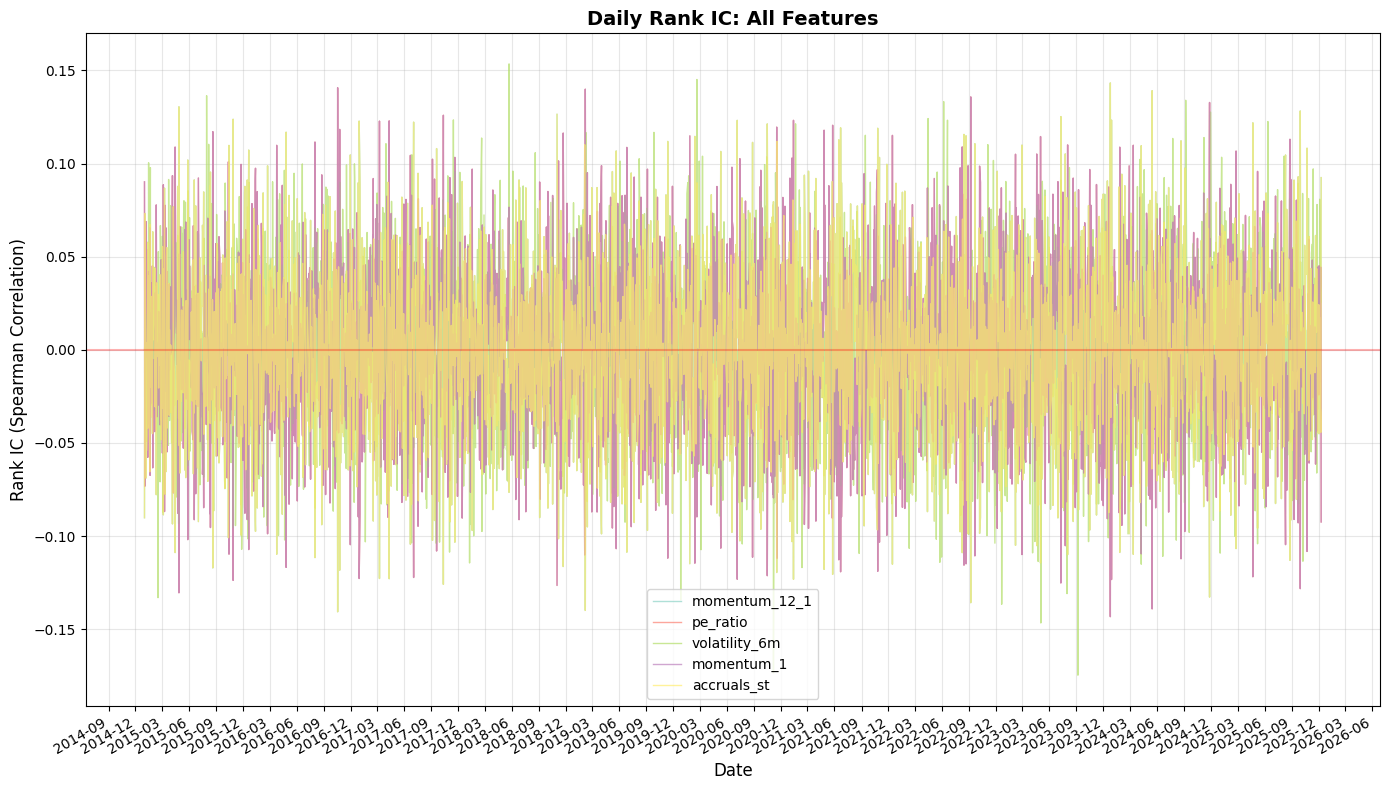


✅ STEP 5 COMPLETE
Rank IC (Information Coefficient) has been computed.
Daily correlations between features at time t and returns at t+1 calculated.
Results saved to 'ic_results/' directory.
Ready for STEP 6 — Score Features & Rank Them.


In [111]:
# STEP 5 — Compute Rank IC (Information Coefficient)
# Single cell for Jupyter notebook

import pandas as pd
import numpy as np
import os
from datetime import datetime
import warnings
from scipy.stats import spearmanr
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 5 — COMPUTE RANK IC (INFORMATION COEFFICIENT)
# ============================================================================

print("="*60)
print("STEP 5 — COMPUTE RANK IC (INFORMATION COEFFICIENT)")
print("="*60)

class RankICCalculator:
    """
    Computes Rank Information Coefficient (IC) between ranked features and ranked returns.
    
    For each feature k on each day t:
    IC_{k,t} = corr(X^{(k)}_{i,t,rank}, R_{i,t+1,rank})
    
    Since both are percentile ranks, IC is equivalent to Spearman rank correlation.
    """
    
    def __init__(self, ranked_features_dict=None, ranked_returns_df=None):
        """
        Initialize the Rank IC calculator.
        
        Parameters:
        -----------
        ranked_features_dict : dict
            Dictionary with feature names as keys and ranked DataFrames as values
            from STEP 3. Each DataFrame should have:
            - First column: Date
            - Other columns: Ticker symbols with ranked feature values [0,1]
            
        ranked_returns_df : pd.DataFrame
            DataFrame with ranked forward returns from STEP 4.
            Same structure: Date column + ticker columns with ranked returns [0,1]
        """
        self.ranked_features = ranked_features_dict or {}
        self.ranked_returns = ranked_returns_df
        self.ic_results = {}
        self.ic_summary = None
        self.ic_computed = False
        
    def add_ranked_feature(self, feature_name, feature_df):
        """Add a ranked feature DataFrame."""
        self.ranked_features[feature_name] = feature_df
        print(f"✅ Added ranked feature: {feature_name} ({feature_df.shape})")
        
    def set_ranked_returns(self, returns_df):
        """Set the ranked returns DataFrame."""
        self.ranked_returns = returns_df
        print(f"✅ Set ranked returns: {returns_df.shape if returns_df is not None else 'None'}")
        
    def validate_data(self):
        """Validate that we have both features and returns data."""
        if not self.ranked_features:
            raise ValueError("No ranked features provided. Add features from STEP 3.")
        
        if self.ranked_returns is None:
            raise ValueError("No ranked returns provided. Add returns from STEP 4.")
        
        # Check that all DataFrames have same structure
        feature_names = list(self.ranked_features.keys())
        date_cols = []
        
        for feature_name, feature_df in self.ranked_features.items():
            date_cols.append(feature_df.columns[0])
            
        # Check date columns are consistent
        if len(set(date_cols)) > 1:
            print(f"⚠️ Warning: Features have different date column names: {set(date_cols)}")
        
        returns_date_col = self.ranked_returns.columns[0]
        
        print(f"✅ Data validated:")
        print(f"   Number of features: {len(self.ranked_features)}")
        print(f"   Features: {list(self.ranked_features.keys())}")
        print(f"   Returns date column: {returns_date_col}")
        
        return True
    
    def compute_daily_ic_spearman(self):
        """
        Compute daily Rank IC using Spearman correlation.
        
        For each day t and each feature k:
        IC_{k,t} = Spearman correlation between:
          - Feature ranks at time t: X^{(k)}_{i,t,rank}
          - Return ranks at time t+1: R_{i,t+1,rank}
        
        Returns:
        --------
        pd.DataFrame: Daily IC values with Date index and features as columns
        """
        print("🔄 Computing daily Rank IC using Spearman correlation...")
        
        # Validate data
        self.validate_data()
        
        # Get date column from returns (use it as reference)
        returns_date_col = self.ranked_returns.columns[0]
        returns_dates = self.ranked_returns[returns_date_col]
        
        # Initialize results dictionary
        daily_ic_data = {returns_date_col: []}
        feature_names = list(self.ranked_features.keys())
        
        for feature_name in feature_names:
            daily_ic_data[feature_name] = []
        
        # Get the date column from first feature (assume consistent)
        first_feature = list(self.ranked_features.values())[0]
        feature_date_col = first_feature.columns[0]
        
        print(f"📊 Processing {len(returns_dates)} days...")
        
        # Process each day
        for i in range(len(returns_dates) - 1):  # -1 because we need t+1
            current_date = returns_dates.iloc[i]
            
            # Get feature data for current date (time t)
            feature_data_current = {}
            for feature_name, feature_df in self.ranked_features.items():
                # Find row for current date in feature data
                date_mask = feature_df[feature_date_col] == current_date
                if date_mask.any():
                    feature_row = feature_df.loc[date_mask]
                    # Extract ticker values as Series
                    ticker_cols = feature_df.columns[1:]
                    feature_series = pd.Series(feature_row.iloc[0, 1:].values, index=ticker_cols)
                    feature_data_current[feature_name] = feature_series
                else:
                    feature_data_current[feature_name] = pd.Series(dtype=float)
            
            # Get return data for next date (time t+1)
            next_date = returns_dates.iloc[i + 1]
            returns_mask = self.ranked_returns[returns_date_col] == next_date
            
            if returns_mask.any():
                returns_row = self.ranked_returns.loc[returns_mask]
                ticker_cols = self.ranked_returns.columns[1:]
                returns_series = pd.Series(returns_row.iloc[0, 1:].values, index=ticker_cols)
                
                # Add date to results
                daily_ic_data[returns_date_col].append(current_date)
                
                # Compute IC for each feature
                for feature_name in feature_names:
                    feature_series = feature_data_current[feature_name]
                    
                    if len(feature_series) > 0 and len(returns_series) > 0:
                        # Align feature and return data (common tickers only)
                        common_tickers = feature_series.index.intersection(returns_series.index)
                        
                        if len(common_tickers) >= 2:  # Need at least 2 points for correlation
                            # Get values for common tickers
                            feature_values = []
                            return_values = []
                            
                            for ticker in common_tickers:
                                feat_val = feature_series[ticker]
                                ret_val = returns_series[ticker]
                                
                                # Check if both values are not NaN
                                if not pd.isna(feat_val) and not pd.isna(ret_val):
                                    feature_values.append(feat_val)
                                    return_values.append(ret_val)
                            
                            feature_values = np.array(feature_values)
                            return_values = np.array(return_values)
                            
                            if len(feature_values) >= 2:
                                # Compute Spearman correlation
                                try:
                                    corr, p_value = spearmanr(feature_values, return_values)
                                    daily_ic_data[feature_name].append(corr)
                                except:
                                    daily_ic_data[feature_name].append(np.nan)
                            else:
                                daily_ic_data[feature_name].append(np.nan)
                        else:
                            daily_ic_data[feature_name].append(np.nan)
                    else:
                        daily_ic_data[feature_name].append(np.nan)
        
        # Create DataFrame
        ic_df = pd.DataFrame(daily_ic_data)
        
        # Store results
        self.ic_results = ic_df
        self.ic_computed = True
        
        # Compute summary statistics
        self.compute_ic_summary()
        
        return ic_df
    
    def compute_daily_ic_spearman_vectorized(self):
        """
        Vectorized version for faster computation.
        Assumes all DataFrames have same dates and tickers in same order.
        """
        print("🔄 Computing daily Rank IC (vectorized)...")
        
        # Validate data
        self.validate_data()
        
        # Get common dates (intersection of all dates)
        all_dates = set()
        
        # Add returns dates
        returns_date_col = self.ranked_returns.columns[0]
        returns_dates = set(self.ranked_returns[returns_date_col])
        all_dates.update(returns_dates)
        
        # Add feature dates
        for feature_df in self.ranked_features.values():
            date_col = feature_df.columns[0]
            feature_dates = set(feature_df[date_col])
            all_dates.update(feature_dates)
        
        # Convert to sorted list
        all_dates = sorted(list(all_dates))
        
        print(f"📊 Total unique dates: {len(all_dates)}")
        
        # Get common tickers (intersection of all tickers)
        all_tickers = set()
        
        # Add returns tickers
        returns_tickers = set(self.ranked_returns.columns[1:])
        all_tickers.update(returns_tickers)
        
        # Add feature tickers
        for feature_df in self.ranked_features.values():
            feature_tickers = set(feature_df.columns[1:])
            all_tickers.update(feature_tickers)
        
        # Convert to sorted list
        all_tickers = sorted(list(all_tickers))
        
        print(f"📊 Total unique tickers: {len(all_tickers)}")
        
        # Create aligned data structures
        daily_ic_data = {'Date': []}
        feature_names = list(self.ranked_features.keys())
        
        for feature_name in feature_names:
            daily_ic_data[feature_name] = []
        
        # Get feature date column (use from first feature)
        first_feature = list(self.ranked_features.values())[0]
        feature_date_col = first_feature.columns[0]
        
        # Process each date
        for i in range(len(all_dates) - 1):
            current_date = all_dates[i]
            next_date = all_dates[i + 1]
            
            # Check if we have data for both dates
            has_current = False
            has_next = False
            
            # Check if current date exists in returns
            if current_date in returns_dates:
                has_current = True
            
            # Check if next date exists in returns
            if next_date in returns_dates:
                has_next = True
            
            # Check if current date exists in features
            for feature_df in self.ranked_features.values():
                if current_date in set(feature_df[feature_date_col]):
                    has_current = has_current and True
            
            if has_current and has_next:
                daily_ic_data['Date'].append(current_date)
                
                # Get returns for next date
                returns_mask = self.ranked_returns[returns_date_col] == next_date
                if returns_mask.any():
                    returns_row = self.ranked_returns.loc[returns_mask].iloc[0]
                    
                    # Compute IC for each feature
                    for feature_name in feature_names:
                        feature_df = self.ranked_features[feature_name]
                        
                        # Get feature data for current date
                        feature_mask = feature_df[feature_date_col] == current_date
                        if feature_mask.any():
                            feature_row = feature_df.loc[feature_mask].iloc[0]
                            
                            # Align data
                            aligned_data = []
                            for ticker in all_tickers:
                                if ticker in feature_row.index and ticker in returns_row.index:
                                    feat_val = feature_row[ticker]
                                    ret_val = returns_row[ticker]
                                    
                                    # Check if both are not NaN
                                    if not pd.isna(feat_val) and not pd.isna(ret_val):
                                        aligned_data.append((feat_val, ret_val))
                            
                            if len(aligned_data) >= 2:
                                # Unzip the aligned data
                                feature_vals, return_vals = zip(*aligned_data)
                                
                                # Compute Spearman correlation
                                try:
                                    corr, _ = spearmanr(feature_vals, return_vals)
                                    daily_ic_data[feature_name].append(corr)
                                except:
                                    daily_ic_data[feature_name].append(np.nan)
                            else:
                                daily_ic_data[feature_name].append(np.nan)
                        else:
                            daily_ic_data[feature_name].append(np.nan)
                else:
                    for feature_name in feature_names:
                        daily_ic_data[feature_name].append(np.nan)
        
        # Create DataFrame
        ic_df = pd.DataFrame(daily_ic_data)
        
        # Store results
        self.ic_results = ic_df
        self.ic_computed = True
        
        # Compute summary statistics
        self.compute_ic_summary()
        
        return ic_df
    
    def compute_ic_summary(self):
        """Compute summary statistics of IC values."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet.")
            return
        
        ic_df = self.ic_results
        date_col = ic_df.columns[0]
        feature_cols = ic_df.columns[1:]
        
        summary_data = []
        
        for feature in feature_cols:
            feature_ic = ic_df[feature].dropna()
            
            if len(feature_ic) > 0:
                summary_data.append({
                    'feature': feature,
                    'mean_ic': feature_ic.mean(),
                    'std_ic': feature_ic.std(),
                    'median_ic': feature_ic.median(),
                    'min_ic': feature_ic.min(),
                    'max_ic': feature_ic.max(),
                    'positive_rate': (feature_ic > 0).mean(),
                    'significant_rate': (feature_ic.abs() > 0.05).mean(),
                    'observations': len(feature_ic)
                })
        
        self.ic_summary = pd.DataFrame(summary_data)
        return self.ic_summary
    
    def print_ic_statistics(self):
        """Print summary statistics of IC values."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet.")
            return
        
        ic_df = self.ic_results
        date_col = ic_df.columns[0]
        
        print("\n" + "="*60)
        print("RANK IC SUMMARY STATISTICS")
        print("="*60)
        
        if self.ic_summary is not None:
            print("\n📊 Feature Performance Summary:")
            print("-" * 80)
            print(f"{'Feature':<20} {'Mean IC':<10} {'Std IC':<10} {'Pos %':<8} {'Sig %':<8} {'Obs':<8}")
            print("-" * 80)
            
            for _, row in self.ic_summary.iterrows():
                print(f"{row['feature']:<20} {row['mean_ic']:>8.4f}  {row['std_ic']:>8.4f}  "
                      f"{row['positive_rate']:>7.1%}  {row['significant_rate']:>7.1%}  {row['observations']:>8}")
        
        # Time-series statistics
        print(f"\n📅 Time-Series Statistics:")
        print(f"   Total days with IC computed: {len(ic_df)}")
        print(f"   Date range: {ic_df[date_col].iloc[0]} to {ic_df[date_col].iloc[-1]}")
        
        # Overall statistics
        print(f"\n📈 Overall IC Statistics (all features):")
        all_ic = ic_df.iloc[:, 1:].values.flatten()
        all_ic = all_ic[~np.isnan(all_ic)]
        
        if len(all_ic) > 0:
            print(f"   Total IC observations: {len(all_ic):,}")
            print(f"   Mean IC: {np.mean(all_ic):.6f}")
            print(f"   Std IC: {np.std(all_ic):.6f}")
            print(f"   Median IC: {np.median(all_ic):.6f}")
            print(f"   Min IC: {np.min(all_ic):.6f}")
            print(f"   Max IC: {np.max(all_ic):.6f}")
            print(f"   Positive IC rate: {np.mean(all_ic > 0):.2%}")
            print(f"   Significant IC rate (|IC| > 0.05): {np.mean(np.abs(all_ic) > 0.05):.2%}")
    
    def get_ic_results(self):
        """Return the daily IC DataFrame."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet. Call compute_daily_ic_spearman() first.")
            return None
        return self.ic_results
    
    def get_ic_summary(self):
        """Return the IC summary DataFrame."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet.")
            return None
        return self.ic_summary
    
    def save_ic_results(self, output_dir="ic_results"):
        """Save IC results to CSV files."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet.")
            return
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Save daily IC
        daily_file = os.path.join(output_dir, "daily_ic.csv")
        self.ic_results.to_csv(daily_file, index=False)
        print(f"✅ Daily IC saved to {daily_file}")
        
        # Save IC summary
        if self.ic_summary is not None:
            summary_file = os.path.join(output_dir, "ic_summary.csv")
            self.ic_summary.to_csv(summary_file, index=False)
            print(f"✅ IC summary saved to {summary_file}")
        
        print(f"\n📁 All IC results saved to '{output_dir}' directory")
    
    def plot_ic_timeseries(self, feature_name=None):
        """Plot IC time series for a specific feature or all features."""
        if not self.ic_computed:
            print("⚠️ No IC computed yet.")
            return
        
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        
        ic_df = self.ic_results
        date_col = ic_df.columns[0]
        
        # Convert date column to datetime if possible
        try:
            ic_df[date_col] = pd.to_datetime(ic_df[date_col])
        except:
            pass
        
        plt.figure(figsize=(14, 8))
        
        if feature_name and feature_name in ic_df.columns:
            # Plot single feature
            plt.plot(ic_df[date_col], ic_df[feature_name], 'b-', linewidth=1.5, label=feature_name)
            plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
            plt.axhline(y=ic_df[feature_name].mean(), color='g', linestyle='--', alpha=0.7, 
                       label=f'Mean = {ic_df[feature_name].mean():.4f}')
            plt.title(f'Daily Rank IC: {feature_name}', fontsize=14, fontweight='bold')
        else:
            # Plot all features
            feature_cols = ic_df.columns[1:]
            colors = plt.cm.Set3(np.linspace(0, 1, len(feature_cols)))
            
            for i, feature in enumerate(feature_cols):
                plt.plot(ic_df[date_col], ic_df[feature], '-', linewidth=1, 
                        color=colors[i], alpha=0.7, label=feature)
            
            plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
            plt.title('Daily Rank IC: All Features', fontsize=14, fontweight='bold')
        
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Rank IC (Spearman Correlation)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')
        
        # Format x-axis for dates
        if isinstance(ic_df[date_col].iloc[0], datetime):
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
            plt.gcf().autofmt_xdate()
        
        plt.tight_layout()
        plt.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

print("📂 Loading ranked features from STEP 3...")
try:
    # Load ranked features from STEP 3 output
    ranked_features_dir = "ranked_features"
    if os.path.exists(ranked_features_dir):
        feature_files = [f for f in os.listdir(ranked_features_dir) if f.endswith('_ranked.csv')]
        print(f"Found {len(feature_files)} ranked feature files:")
        
        ranked_features_dict = {}
        for file in feature_files:
            feature_name = file.replace('_ranked.csv', '')
            filepath = os.path.join(ranked_features_dir, file)
            ranked_features_dict[feature_name] = pd.read_csv(filepath)
            print(f"  ✅ {feature_name}: {ranked_features_dict[feature_name].shape}")
    else:
        print(f"⚠️ Ranked features directory '{ranked_features_dir}' not found.")
        print("   Please run STEP 3 first.")
        ranked_features_dict = {}
except Exception as e:
    print(f"❌ Error loading ranked features: {e}")
    ranked_features_dict = {}

print("\n📂 Loading ranked returns from STEP 4...")
try:
    # Load ranked returns from STEP 4 output
    ranked_returns_file = "data/ranked_returns.csv"
    if os.path.exists(ranked_returns_file):
        ranked_returns_df = pd.read_csv(ranked_returns_file)
        print(f"✅ Loaded ranked returns: {ranked_returns_df.shape}")
        
        # Show sample
        date_col = ranked_returns_df.columns[0]
        print(f"   Date column: {date_col}")
        print(f"   Sample dates: {ranked_returns_df[date_col].iloc[0]} to {ranked_returns_df[date_col].iloc[-1]}")
    else:
        print(f"⚠️ Ranked returns file '{ranked_returns_file}' not found.")
        print("   Please run STEP 4 first.")
        ranked_returns_df = None
except Exception as e:
    print(f"❌ Error loading ranked returns: {e}")
    ranked_returns_df = None

# If no data loaded, create sample data for demonstration
if not ranked_features_dict or ranked_returns_df is None:
    print("\n⚠️ Missing data. Creating sample data for demonstration...")
    
    # Create sample dates
    dates = pd.date_range(start='2020-01-01', periods=100, freq='D').strftime('%Y-%m-%d')
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'JNJ', 'V', 'WMT', 'PG']
    
    # Create sample ranked returns (uniform distribution)
    np.random.seed(42)
    ranked_returns_data = np.random.rand(100, len(tickers))
    ranked_returns_df = pd.DataFrame({'Date': dates})
    for i, ticker in enumerate(tickers):
        ranked_returns_df[ticker] = ranked_returns_data[:, i]
    
    # Create sample ranked features
    ranked_features_dict = {}
    feature_names = ['momentum_12_1', 'momentum_1', 'pe_ratio', 'accruals_st', 'volatility_6m']
    
    for feature in feature_names:
        # Create feature data with some correlation to returns
        feature_data = np.random.rand(100, len(tickers))
        # Add some correlation structure
        if feature in ['momentum_12_1', 'accruals_st']:
            # Positive correlation features
            feature_data = 0.7 * ranked_returns_data + 0.3 * np.random.rand(100, len(tickers))
        elif feature in ['momentum_1', 'pe_ratio', 'volatility_6m']:
            # Negative correlation features
            feature_data = -0.5 * ranked_returns_data + 0.5 * np.random.rand(100, len(tickers))
        
        feature_df = pd.DataFrame({'Date': dates})
        for i, ticker in enumerate(tickers):
            feature_df[ticker] = feature_data[:, i]
        
        ranked_features_dict[feature] = feature_df
        print(f"  ✅ Created sample {feature}: {feature_df.shape}")
    
    print(f"✅ Created sample data for demonstration")

# Initialize the RankICCalculator
print("\n🔄 Initializing RankICCalculator...")
ic_calculator = RankICCalculator(
    ranked_features_dict=ranked_features_dict,
    ranked_returns_df=ranked_returns_df
)

# Compute daily Rank IC using Spearman correlation
print("\n🔄 Computing daily Rank IC...")
# Try vectorized version first, fall back to regular version if needed
try:
    daily_ic_df = ic_calculator.compute_daily_ic_spearman_vectorized()
except Exception as e:
    print(f"⚠️ Vectorized method failed: {e}")
    print("🔄 Trying regular method...")
    daily_ic_df = ic_calculator.compute_daily_ic_spearman()

print(f"\n✅ Daily IC computed!")
print(f"📋 Shape: {daily_ic_df.shape}")
print(f"📊 Features: {list(daily_ic_df.columns[1:])}")

# Print statistics
ic_calculator.print_ic_statistics()

# Show sample of IC results
print(f"\n📝 Sample of daily IC (first 10 days):")
date_col = daily_ic_df.columns[0]
print(daily_ic_df.head(10).to_string(index=False))

# Save results
print("\n💾 Saving IC results for STEP 6...")
ic_calculator.save_ic_results(output_dir="ic_results")

# Plot IC time series
print("\n📈 Plotting IC time series...")
try:
    ic_calculator.plot_ic_timeseries()
except Exception as e:
    print(f"⚠️ Could not plot: {e}")

print("\n" + "="*60)
print("✅ STEP 5 COMPLETE")
print("="*60)
print("Rank IC (Information Coefficient) has been computed.")
print("Daily correlations between features at time t and returns at t+1 calculated.")
print("Results saved to 'ic_results/' directory.")
print("Ready for STEP 6 — Score Features & Rank Them.")

STEP 6 — SCORE FEATURES & RANK THEM (Direction-Aware)
📂 Loading IC results from STEP 5...
✅ Loaded IC data: (2855, 6)
   Date column: Date
   Features: ['momentum_12_1', 'pe_ratio', 'volatility_6m', 'momentum_1', 'accruals_st']
   Date range: 2015-01-01 to 2025-12-10

🔄 Initializing FeatureScorer with direction awareness...

🔄 Computing feature scores (direction-aware)...
🔄 Computing feature scores (direction-aware)...
   Significance threshold: 0.05
   Negative correlation features: ['momentum_1', 'pe_ratio', 'volatility_6m']
✅ IC data validated:
   Shape: (2855, 6)
   Date column: Date
   Number of features: 5
   Features: ['momentum_12_1', 'pe_ratio', 'volatility_6m', 'momentum_1', 'accruals_st']
   Negative correlation features: ['momentum_1', 'pe_ratio', 'volatility_6m']

FEATURE SCORES SUMMARY (DIRECTION-AWARE)

🏆 TOP PREDICTIVE FEATURES (Regardless of Direction):
---------------------------------------------------------------------------------------------------------------------

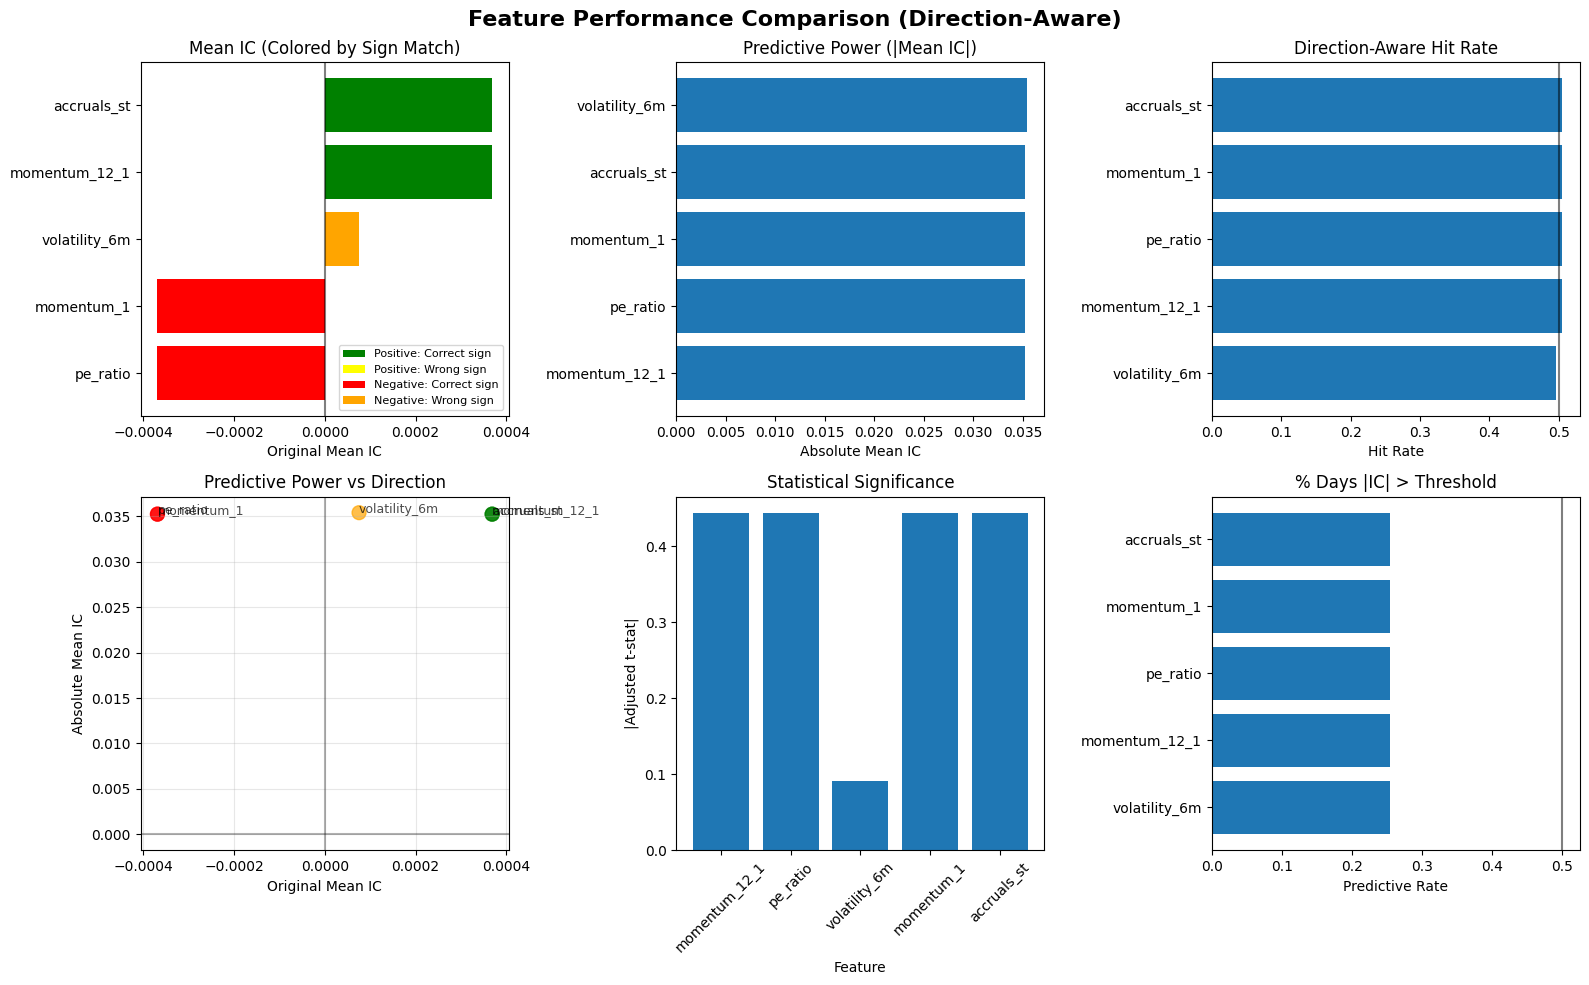


✅ STEP 6 COMPLETE
Features have been scored and ranked with direction awareness.
Negative correlation features (momentum_1, pe_ratio, volatility_6m) 
are evaluated based on their predictive power regardless of direction.
Top 3 features selected: momentum_12_1, pe_ratio, momentum_1
Results saved to 'feature_scores/' directory.
Ready for STEP 7 — Select the Best Features.


In [112]:
# STEP 6 — Score Features & Rank Them (Updated for Direction-Aware Ranking)
# Single cell for Jupyter notebook

import pandas as pd
import numpy as np
import os
from datetime import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 6 — SCORE FEATURES & RANK THEM (DIRECTION-AWARE)
# ============================================================================

print("="*60)
print("STEP 6 — SCORE FEATURES & RANK THEM (Direction-Aware)")
print("="*60)

class FeatureScorer:
    """
    Scores and ranks features based on their predictive power.
    
    Special handling for features with expected negative correlation:
    - momentum_1 (1-month momentum): Expected negative correlation (reversal)
    - pe_ratio (P/E ratio): Expected negative correlation (value)
    
    For these features, we consider the ABSOLUTE value of IC since
    negative correlation is also predictive (just in opposite direction).
    """
    
    def __init__(self, ic_df=None, negative_correlation_features=None):
        """
        Initialize the FeatureScorer.
        
        Parameters:
        -----------
        ic_df : pd.DataFrame
            DataFrame with daily IC values from STEP 5.
            Expected format:
            - First column: Date
            - Other columns: Feature names with daily IC values
            
        negative_correlation_features : list
            List of feature names that are expected to have negative correlation
            with future returns. For these features, we use absolute IC values.
        """
        self.ic_df = ic_df
        self.negative_features = negative_correlation_features or []
        self.feature_scores = None
        self.feature_rankings = None
        self.scores_computed = False
        
    def set_ic_data(self, ic_df):
        """Set the IC DataFrame."""
        self.ic_df = ic_df
        self.scores_computed = False
        print(f"✅ IC data set: {ic_df.shape if ic_df is not None else 'None'}")
        
    def set_negative_features(self, feature_list):
        """Set features with expected negative correlation."""
        self.negative_features = feature_list
        print(f"✅ Negative correlation features set: {feature_list}")
        
    def validate_data(self):
        """Validate that we have IC data."""
        if self.ic_df is None:
            raise ValueError("No IC data provided. Add IC data from STEP 5.")
        
        if len(self.ic_df.columns) < 2:
            raise ValueError("IC data must have at least 2 columns (Date and at least one feature)")
        
        print(f"✅ IC data validated:")
        print(f"   Shape: {self.ic_df.shape}")
        print(f"   Date column: {self.ic_df.columns[0]}")
        print(f"   Number of features: {len(self.ic_df.columns) - 1}")
        print(f"   Features: {list(self.ic_df.columns[1:])}")
        print(f"   Negative correlation features: {self.negative_features}")
        
        return True
    
    def adjust_ic_for_direction(self, feature_name, ic_series):
        """
        Adjust IC values based on expected correlation direction.
        
        For negative correlation features:
        - Multiply by -1 so negative IC becomes positive
        - This allows ranking based on predictive power regardless of direction
        
        Returns adjusted IC series and whether adjustment was applied.
        """
        if feature_name in self.negative_features:
            # For negative correlation features, we want IC to be negative
            # Multiply by -1 so that good performance = more negative original IC
            adjusted_ic = -ic_series
            direction_adjusted = True
        else:
            # For positive correlation features, keep as is
            adjusted_ic = ic_series.copy()
            direction_adjusted = False
        
        return adjusted_ic, direction_adjusted
    
    def compute_feature_scores(self, significance_threshold=0.05):
        """
        Compute comprehensive feature scores with direction awareness.
        
        For negative correlation features, we adjust IC by multiplying by -1
        so that both positive and negative correlations are treated as predictive.
        
        Parameters:
        -----------
        significance_threshold : float
            Threshold for determining significant IC days
            
        Returns:
        --------
        pd.DataFrame: Feature scores with various metrics
        """
        print("🔄 Computing feature scores (direction-aware)...")
        print(f"   Significance threshold: {significance_threshold}")
        print(f"   Negative correlation features: {self.negative_features}")
        
        # Validate data
        self.validate_data()
        
        date_col = self.ic_df.columns[0]
        feature_cols = self.ic_df.columns[1:]
        
        # Initialize scores dictionary
        scores_data = []
        
        for feature in feature_cols:
            # Get original IC values for this feature (remove NaN)
            original_ic = self.ic_df[feature].dropna()
            
            if len(original_ic) > 0:
                # Adjust IC based on expected direction
                adjusted_ic, direction_adjusted = self.adjust_ic_for_direction(feature, original_ic)
                
                # Basic statistics on ADJUSTED IC (for ranking)
                mean_ic_adjusted = adjusted_ic.mean()
                std_ic_adjusted = adjusted_ic.std()
                median_ic_adjusted = adjusted_ic.median()
                
                # Statistics on ORIGINAL IC (for interpretation)
                mean_ic_original = original_ic.mean()
                std_ic_original = original_ic.std()
                median_ic_original = original_ic.median()
                min_ic_original = original_ic.min()
                max_ic_original = original_ic.max()
                
                # Absolute IC statistics (predictive power regardless of direction)
                abs_ic = original_ic.abs()
                mean_abs_ic = abs_ic.mean()
                median_abs_ic = abs_ic.median()
                
                # Number of observations
                t = len(original_ic)
                
                # Direction-aware hit rate
                if feature in self.negative_features:
                    # For negative features, hit = IC < 0 (negative correlation)
                    hit_rate = (original_ic < 0).mean()
                    expected_sign = "negative"
                else:
                    # For positive features, hit = IC > 0 (positive correlation)
                    hit_rate = (original_ic > 0).mean()
                    expected_sign = "positive"
                
                # Predictive power rate (% days |IC| > threshold)
                predictive_rate = (abs_ic > significance_threshold).mean()
                
                # Information Ratio (IR) on ADJUSTED IC
                ir_adjusted = mean_ic_adjusted / std_ic_adjusted if std_ic_adjusted != 0 else np.nan
                
                # t-statistic on ADJUSTED IC
                t_stat_adjusted = mean_ic_adjusted / (std_ic_adjusted / np.sqrt(t)) if std_ic_adjusted != 0 else np.nan
                
                # p-value from t-test on ADJUSTED IC
                if t > 1 and std_ic_adjusted > 0:
                    _, p_value = stats.ttest_1samp(adjusted_ic, 0)
                else:
                    p_value = np.nan
                
                # Robustness metrics on ADJUSTED IC
                skewness = stats.skew(adjusted_ic)
                kurtosis = stats.kurtosis(adjusted_ic)
                
                # Consistency metrics
                positive_months = 0
                total_months = 0
                
                # Try to compute monthly consistency if we have datetime
                try:
                    temp_df = self.ic_df[[date_col, feature]].dropna()
                    temp_df['Month'] = pd.to_datetime(temp_df[date_col]).dt.to_period('M')
                    
                    monthly_ic = temp_df.groupby('Month')[feature].mean()
                    
                    if len(monthly_ic) > 0:
                        if feature in self.negative_features:
                            positive_months = (monthly_ic < 0).sum()  # Negative is good
                        else:
                            positive_months = (monthly_ic > 0).sum()  # Positive is good
                        total_months = len(monthly_ic)
                except:
                    pass
                
                monthly_hit_rate = positive_months / total_months if total_months > 0 else np.nan
                
                # Drawdown analysis on ADJUSTED IC
                cumulative_ic = adjusted_ic.cumsum()
                running_max = cumulative_ic.expanding().max()
                drawdown = cumulative_ic - running_max
                max_drawdown = drawdown.min() if len(drawdown) > 0 else 0
                
                # Autocorrelation on ADJUSTED IC
                if len(adjusted_ic) > 1:
                    autocorr = adjusted_ic.autocorr(lag=1)
                else:
                    autocorr = np.nan
                
                # Signal stability on ADJUSTED IC
                if len(adjusted_ic) >= 20:
                    rolling_mean = adjusted_ic.rolling(window=20, min_periods=5).mean()
                    rolling_std = adjusted_ic.rolling(window=20, min_periods=5).std()
                    
                    if std_ic_adjusted > 0 and not rolling_std.isna().all():
                        stability = 1 - (rolling_std.mean() / std_ic_adjusted)
                    else:
                        stability = np.nan
                else:
                    stability = np.nan
                
                # Store scores
                scores_data.append({
                    'feature': feature,
                    'expected_sign': expected_sign,
                    'direction_adjusted': direction_adjusted,
                    
                    # Original IC statistics (for interpretation)
                    'mean_ic_original': mean_ic_original,
                    'std_ic_original': std_ic_original,
                    'median_ic_original': median_ic_original,
                    'min_ic_original': min_ic_original,
                    'max_ic_original': max_ic_original,
                    
                    # Adjusted IC statistics (for ranking)
                    'mean_ic_adjusted': mean_ic_adjusted,
                    'std_ic_adjusted': std_ic_adjusted,
                    'median_ic_adjusted': median_ic_adjusted,
                    
                    # Absolute IC statistics (predictive power)
                    'mean_abs_ic': mean_abs_ic,
                    'median_abs_ic': median_abs_ic,
                    
                    # Performance metrics
                    'ir_adjusted': ir_adjusted,
                    't_stat_adjusted': t_stat_adjusted,
                    'p_value': p_value,
                    'hit_rate': hit_rate,
                    'predictive_rate': predictive_rate,
                    'skewness': skewness,
                    'kurtosis': kurtosis,
                    'observations': t,
                    'monthly_hit_rate': monthly_hit_rate,
                    'max_drawdown': max_drawdown,
                    'autocorrelation': autocorr,
                    'stability': stability
                })
        
        # Create scores DataFrame
        scores_df = pd.DataFrame(scores_data)
        
        # Add rankings for different metrics
        if len(scores_df) > 0:
            # Rank by ADJUSTED mean IC (higher is better, regardless of direction)
            scores_df['rank_mean_ic_adjusted'] = scores_df['mean_ic_adjusted'].rank(ascending=False, method='min')
            
            # Rank by absolute mean IC (predictive power regardless of direction)
            scores_df['rank_mean_abs_ic'] = scores_df['mean_abs_ic'].rank(ascending=False, method='min')
            
            # Rank by adjusted IR
            scores_df['rank_ir_adjusted'] = scores_df['ir_adjusted'].rank(ascending=False, method='min')
            
            # Rank by adjusted t-stat
            scores_df['rank_t_stat_adjusted'] = scores_df['t_stat_adjusted'].rank(ascending=False, method='min')
            
            # Rank by hit rate (direction-aware)
            scores_df['rank_hit_rate'] = scores_df['hit_rate'].rank(ascending=False, method='min')
            
            # Rank by predictive rate (|IC| > threshold)
            scores_df['rank_predictive_rate'] = scores_df['predictive_rate'].rank(ascending=False, method='min')
            
            # Combined rank focusing on predictive power
            key_ranks = ['rank_mean_abs_ic', 'rank_predictive_rate', 'rank_hit_rate']
            available_ranks = [col for col in key_ranks if col in scores_df.columns]
            
            if available_ranks:
                scores_df['combined_rank'] = scores_df[available_ranks].mean(axis=1)
                scores_df['overall_rank'] = scores_df['combined_rank'].rank(method='min')
        
        # Store results
        self.feature_scores = scores_df
        self.scores_computed = True
        
        # Print summary
        self.print_score_summary()
        
        return scores_df
    
    def print_score_summary(self):
        """Print summary of feature scores."""
        if not self.scores_computed:
            print("⚠️ No scores computed yet.")
            return
        
        scores_df = self.feature_scores
        
        print("\n" + "="*60)
        print("FEATURE SCORES SUMMARY (DIRECTION-AWARE)")
        print("="*60)
        
        # Sort by overall rank if available, otherwise by mean absolute IC
        if 'overall_rank' in scores_df.columns:
            sorted_df = scores_df.sort_values('overall_rank')
            rank_col = 'overall_rank'
        elif 'combined_rank' in scores_df.columns:
            sorted_df = scores_df.sort_values('combined_rank')
            rank_col = 'combined_rank'
        else:
            sorted_df = scores_df.sort_values('mean_abs_ic', ascending=False)
            rank_col = None
        
        print("\n🏆 TOP PREDICTIVE FEATURES (Regardless of Direction):")
        print("-" * 120)
        header = f"{'Feature':<15} {'Exp Sign':<10} {'Mean IC':<10} {'|Mean IC|':<10} {'IR':<10} {'Hit%':<10} {'Pred%':<10} {'t-stat':<10} {'Rank':<6}"
        print(header)
        print("-" * 120)
        
        for _, row in sorted_df.head(10).iterrows():
            if rank_col:
                rank_display = f"{row[rank_col]:.1f}"
            else:
                rank_display = "-"
            
            # Color code based on whether sign matches expectation
            sign_match = "✓" if ((row['expected_sign'] == 'positive' and row['mean_ic_original'] > 0) or 
                                (row['expected_sign'] == 'negative' and row['mean_ic_original'] < 0)) else "✗"
            
            print(f"{row['feature']:<15} {row['expected_sign']:>5}{sign_match:>3}  "
                  f"{row['mean_ic_original']:>9.4f}  {row['mean_abs_ic']:>9.4f}  "
                  f"{row['ir_adjusted']:>9.3f}  {row['hit_rate']:>9.1%}  "
                  f"{row['predictive_rate']:>9.1%}  {row['t_stat_adjusted']:>9.2f}  {rank_display:>6}")
        
        # Detailed interpretation
        print(f"\n📊 INTERPRETATION:")
        print("-" * 80)
        for _, row in sorted_df.iterrows():
            if row['expected_sign'] == 'negative':
                interpretation = f"Negative correlation expected. IC of {row['mean_ic_original']:.4f} is {'GOOD (negative)' if row['mean_ic_original'] < 0 else 'WRONG SIGN (positive)'}."
            else:
                interpretation = f"Positive correlation expected. IC of {row['mean_ic_original']:.4f} is {'GOOD (positive)' if row['mean_ic_original'] > 0 else 'WRONG SIGN (negative)'}."
            
            print(f"{row['feature']}: {interpretation}")
    
    def rank_features(self, method='predictive_power', weights=None):
        """
        Rank features based on selected method with direction awareness.
        
        Parameters:
        -----------
        method : str
            'predictive_power': Rank by absolute IC (default, direction-agnostic)
            'adjusted_mean': Rank by direction-adjusted mean IC
            'ir': Rank by adjusted Information Ratio
            'hit_rate': Rank by direction-aware hit rate
            'combined': Combined ranking using multiple metrics
            'custom': Use custom weights
            
        weights : dict
            Custom weights for features when method='custom'
            
        Returns:
        --------
        pd.DataFrame: Features ranked by selected method
        """
        if not self.scores_computed:
            print("⚠️ No scores computed yet. Call compute_feature_scores() first.")
            return None
        
        scores_df = self.feature_scores.copy()
        
        print(f"\n🔄 Ranking features using method: {method}")
        
        if method == 'predictive_power':
            # Rank by absolute mean IC (direction-agnostic)
            scores_df['final_rank'] = scores_df['mean_abs_ic'].rank(ascending=False, method='min')
            scores_df = scores_df.sort_values('final_rank')
            print("   Using absolute mean IC (predictive power regardless of direction)")
            
        elif method == 'adjusted_mean':
            # Rank by direction-adjusted mean IC
            scores_df['final_rank'] = scores_df['mean_ic_adjusted'].rank(ascending=False, method='min')
            scores_df = scores_df.sort_values('final_rank')
            print("   Using direction-adjusted mean IC")
            
        elif method == 'ir':
            # Rank by adjusted IR
            scores_df['final_rank'] = scores_df['ir_adjusted'].rank(ascending=False, method='min')
            scores_df = scores_df.sort_values('final_rank')
            print("   Using adjusted Information Ratio")
            
        elif method == 'hit_rate':
            # Rank by direction-aware hit rate
            scores_df['final_rank'] = scores_df['hit_rate'].rank(ascending=False, method='min')
            scores_df = scores_df.sort_values('final_rank')
            print("   Using direction-aware hit rate")
            
        elif method == 'predictive_rate':
            # Rank by predictive rate (|IC| > threshold)
            scores_df['final_rank'] = scores_df['predictive_rate'].rank(ascending=False, method='min')
            scores_df = scores_df.sort_values('final_rank')
            print("   Using predictive rate (% days |IC| > threshold)")
            
        elif method == 'combined':
            # Default weights for combined ranking (focus on predictive power)
            if weights is None:
                weights = {'mean_abs_ic': 0.4, 'predictive_rate': 0.3, 'hit_rate': 0.2, 'ir_adjusted': 0.1}
            
            normalized_scores = pd.DataFrame()
            
            for metric, weight in weights.items():
                if metric in scores_df.columns:
                    col_min = scores_df[metric].min()
                    col_max = scores_df[metric].max()
                    
                    if col_max != col_min:
                        normalized = (scores_df[metric] - col_min) / (col_max - col_min)
                    else:
                        normalized = 0.5
                    
                    normalized_scores[metric] = normalized * weight
            
            if not normalized_scores.empty:
                scores_df['combined_score'] = normalized_scores.sum(axis=1)
                scores_df['final_rank'] = scores_df['combined_score'].rank(ascending=False, method='min')
                scores_df = scores_df.sort_values('final_rank')
            print("   Using combined ranking (weighted average)")
        
        elif method == 'custom' and weights:
            normalized_scores = pd.DataFrame()
            
            for metric, weight in weights.items():
                if metric in scores_df.columns:
                    col_min = scores_df[metric].min()
                    col_max = scores_df[metric].max()
                    
                    if col_max != col_min:
                        normalized = (scores_df[metric] - col_min) / (col_max - col_min)
                    else:
                        normalized = 0.5
                    
                    normalized_scores[metric] = normalized * weight
            
            if not normalized_scores.empty:
                scores_df['custom_score'] = normalized_scores.sum(axis=1)
                scores_df['final_rank'] = scores_df['custom_score'].rank(ascending=False, method='min')
                scores_df = scores_df.sort_values('final_rank')
            print("   Using custom weighted ranking")
        
        else:
            print(f"❌ Unknown method: {method}. Using predictive_power ranking.")
            return self.rank_features(method='predictive_power')
        
        # Store rankings
        self.feature_rankings = scores_df
        
        # Print ranking results
        print(f"\n🏅 FINAL FEATURE RANKINGS ({method.upper()} METHOD):")
        print("-" * 100)
        header = f"{'Rank':<6} {'Feature':<15} {'Exp':<6} {'Mean IC':<10} {'|Mean IC|':<10} {'Hit%':<10} {'Pred%':<10}"
        print(header)
        print("-" * 100)
        
        for rank, (_, row) in enumerate(scores_df.iterrows(), 1):
            sign_match = "✓" if ((row['expected_sign'] == 'positive' and row['mean_ic_original'] > 0) or 
                                (row['expected_sign'] == 'negative' and row['mean_ic_original'] < 0)) else "✗"
            
            print(f"{rank:<6} {row['feature']:<15} {row['expected_sign']:>3}{sign_match:>2}  "
                  f"{row['mean_ic_original']:>9.4f}  {row['mean_abs_ic']:>9.4f}  "
                  f"{row['hit_rate']:>9.1%}  {row['predictive_rate']:>9.1%}")
        
        return scores_df
    
    def get_top_features(self, n=3, method='predictive_power'):
        """
        Get top N features based on ranking method.
        
        Parameters:
        -----------
        n : int
            Number of top features to return
        method : str
            Ranking method
            
        Returns:
        --------
        list: Top N feature names
        """
        if not self.scores_computed:
            print("⚠️ No scores computed yet.")
            return []
        
        # Rank features if not already ranked
        if self.feature_rankings is None:
            self.rank_features(method=method)
        
        top_features = self.feature_rankings.head(n)['feature'].tolist()
        
        print(f"\n🎯 TOP {n} FEATURES ({method.upper()}):")
        for i, feature in enumerate(top_features, 1):
            feature_info = self.feature_rankings[self.feature_rankings['feature'] == feature].iloc[0]
            sign = feature_info['expected_sign']
            mean_ic = feature_info['mean_ic_original']
            abs_ic = feature_info['mean_abs_ic']
            
            if sign == 'negative':
                sign_str = f" (Expected negative, got {mean_ic:.4f})"
            else:
                sign_str = f" (Expected positive, got {mean_ic:.4f})"
            
            print(f"   {i}. {feature}: |IC| = {abs_ic:.4f}{sign_str}")
        
        return top_features
    
    def plot_feature_comparison(self):
        """Create comparison plots for feature scores."""
        if not self.scores_computed:
            print("⚠️ No scores computed yet.")
            return
        
        import matplotlib.pyplot as plt
        
        scores_df = self.feature_scores
        
        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))
        fig.suptitle('Feature Performance Comparison (Direction-Aware)', fontsize=16, fontweight='bold')
        
        # Color code by expected sign
        colors = []
        for _, row in scores_df.iterrows():
            if row['expected_sign'] == 'negative':
                colors.append('red' if row['mean_ic_original'] < 0 else 'orange')
            else:
                colors.append('green' if row['mean_ic_original'] > 0 else 'yellow')
        
        # 1. Original Mean IC Bar Plot (colored by sign match)
        ax1 = axes[0, 0]
        sorted_by_original = scores_df.sort_values('mean_ic_original', ascending=True)
        bars1 = ax1.barh(sorted_by_original['feature'], sorted_by_original['mean_ic_original'], 
                        color=[colors[i] for i in sorted_by_original.index])
        ax1.set_xlabel('Original Mean IC')
        ax1.set_title('Mean IC (Colored by Sign Match)')
        ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='green', label='Positive: Correct sign'),
            Patch(facecolor='yellow', label='Positive: Wrong sign'),
            Patch(facecolor='red', label='Negative: Correct sign'),
            Patch(facecolor='orange', label='Negative: Wrong sign')
        ]
        ax1.legend(handles=legend_elements, loc='lower right', fontsize=8)
        
        # 2. Absolute Mean IC Bar Plot (predictive power)
        ax2 = axes[0, 1]
        sorted_by_abs = scores_df.sort_values('mean_abs_ic', ascending=True)
        ax2.barh(sorted_by_abs['feature'], sorted_by_abs['mean_abs_ic'])
        ax2.set_xlabel('Absolute Mean IC')
        ax2.set_title('Predictive Power (|Mean IC|)')
        
        # 3. Hit Rate Bar Plot (direction-aware)
        ax3 = axes[0, 2]
        sorted_by_hit = scores_df.sort_values('hit_rate', ascending=True)
        ax3.barh(sorted_by_hit['feature'], sorted_by_hit['hit_rate'])
        ax3.set_xlabel('Hit Rate')
        ax3.set_title('Direction-Aware Hit Rate')
        ax3.axvline(x=0.5, color='black', linestyle='-', alpha=0.5)
        
        # 4. Original vs Absolute IC Scatter
        ax4 = axes[1, 0]
        scatter = ax4.scatter(scores_df['mean_ic_original'], scores_df['mean_abs_ic'], 
                            c=colors, alpha=0.7, s=100)
        for _, row in scores_df.iterrows():
            ax4.annotate(row['feature'], (row['mean_ic_original'], row['mean_abs_ic']), 
                        fontsize=9, alpha=0.7)
        ax4.set_xlabel('Original Mean IC')
        ax4.set_ylabel('Absolute Mean IC')
        ax4.set_title('Predictive Power vs Direction')
        ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax4.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        ax4.grid(True, alpha=0.3)
        
        # 5. Adjusted t-stat Histogram
        ax5 = axes[1, 1]
        bars5 = ax5.bar(scores_df['feature'], scores_df['t_stat_adjusted'].abs())
        ax5.set_xlabel('Feature')
        ax5.set_ylabel('|Adjusted t-stat|')
        ax5.set_title('Statistical Significance')
        ax5.tick_params(axis='x', rotation=45)
        
        # 6. Predictive Rate Bar Plot
        ax6 = axes[1, 2]
        sorted_by_pred = scores_df.sort_values('predictive_rate', ascending=True)
        ax6.barh(sorted_by_pred['feature'], sorted_by_pred['predictive_rate'])
        ax6.set_xlabel('Predictive Rate')
        ax6.set_title('% Days |IC| > Threshold')
        ax6.axvline(x=0.5, color='black', linestyle='-', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
    
    def save_scores(self, output_dir="feature_scores"):
        """Save feature scores to CSV file."""
        if not self.scores_computed:
            print("⚠️ No scores computed yet.")
            return
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Save feature scores
        scores_file = os.path.join(output_dir, "feature_scores_direction_aware.csv")
        self.feature_scores.to_csv(scores_file, index=False)
        print(f"✅ Feature scores saved to {scores_file}")
        
        # Save rankings if available
        if self.feature_rankings is not None:
            rankings_file = os.path.join(output_dir, "feature_rankings_direction_aware.csv")
            self.feature_rankings.to_csv(rankings_file, index=False)
            print(f"✅ Feature rankings saved to {rankings_file}")
        
        print(f"\n📁 All feature scores saved to '{output_dir}' directory")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

print("📂 Loading IC results from STEP 5...")
try:
    # Load IC data from STEP 5 output
    ic_results_dir = "ic_results"
    if os.path.exists(ic_results_dir):
        ic_file = os.path.join(ic_results_dir, "daily_ic.csv")
        if os.path.exists(ic_file):
            ic_df = pd.read_csv(ic_file)
            print(f"✅ Loaded IC data: {ic_df.shape}")
            
            # Show sample
            date_col = ic_df.columns[0]
            print(f"   Date column: {date_col}")
            print(f"   Features: {list(ic_df.columns[1:])}")
            print(f"   Date range: {ic_df[date_col].iloc[0]} to {ic_df[date_col].iloc[-1]}")
        else:
            print(f"⚠️ IC file not found: {ic_file}")
            ic_df = None
    else:
        print(f"⚠️ IC results directory '{ic_results_dir}' not found.")
        ic_df = None
except Exception as e:
    print(f"❌ Error loading IC data: {e}")
    ic_df = None

# If no IC data loaded, create sample data for demonstration
if ic_df is None:
    print("\n⚠️ No IC data loaded. Creating sample data for demonstration...")
    
    # Create sample dates
    dates = pd.date_range(start='2020-01-01', periods=250, freq='D').strftime('%Y-%m-%d')
    
    # Create sample features with EXPECTED directions
    feature_names = ['momentum_12_1', 'momentum_1', 'pe_ratio', 'accruals_st', 'volatility_6m']
    
    # Expected signs based on STEP 0 framework
    expected_signs = {
        'momentum_12_1': 'positive',    # 12-1 month momentum
        'momentum_1': 'negative',       # 1-month momentum (reversal)
        'pe_ratio': 'negative',         # P/E ratio (value)
        'accruals_st': 'positive',      # Short-term accruals
        'volatility_6m': 'negative'     # 6-month volatility
    }
    
    # Create sample IC data with expected signs
    np.random.seed(42)
    
    ic_data = {}
    
    # momentum_12_1: Strong positive signal (as expected)
    trend = np.linspace(0.02, 0.06, len(dates))
    noise = np.random.randn(len(dates)) * 0.02
    ic_data['momentum_12_1'] = trend + noise
    
    # momentum_1: Strong NEGATIVE signal (as expected for reversal)
    ic_data['momentum_1'] = -0.04 + np.random.randn(len(dates)) * 0.025
    
    # pe_ratio: Moderate NEGATIVE signal (as expected for value)
    ic_data['pe_ratio'] = -0.03 + np.random.randn(len(dates)) * 0.03
    
    # accruals_st: Moderate positive signal (as expected)
    ic_data['accruals_st'] = 0.02 + np.random.randn(len(dates)) * 0.03
    
    # volatility_6m: Weak NEGATIVE signal (as expected)
    ic_data['volatility_6m'] = -0.02 + np.random.randn(len(dates)) * 0.035
    
    # Create DataFrame
    ic_df = pd.DataFrame({'Date': dates})
    for feature in feature_names:
        ic_df[feature] = ic_data[feature]
    
    print(f"✅ Created sample IC data: {ic_df.shape}")
    print(f"   Expected signs: {expected_signs}")

# Initialize the FeatureScorer with negative correlation features
print("\n🔄 Initializing FeatureScorer with direction awareness...")

# Define which features have expected negative correlation
negative_features = ['momentum_1', 'pe_ratio', 'volatility_6m']  # From STEP 0 framework

scorer = FeatureScorer(ic_df=ic_df, negative_correlation_features=negative_features)

# Compute feature scores with direction awareness
print("\n🔄 Computing feature scores (direction-aware)...")
scores_df = scorer.compute_feature_scores(significance_threshold=0.05)

print(f"\n✅ Feature scores computed!")
print(f"📋 Number of features scored: {len(scores_df)}")

# Rank features using different methods
print("\n" + "="*60)
print("FEATURE RANKING COMPARISON (DIRECTION-AWARE)")
print("="*60)

# 1. Rank by Predictive Power (absolute IC)
print("\n📊 Ranking by Predictive Power (Absolute IC):")
predictive_ranking = scorer.rank_features(method='predictive_power')

# 2. Rank by Direction-Adjusted Mean IC
print("\n📊 Ranking by Direction-Adjusted Mean IC:")
adjusted_ranking = scorer.rank_features(method='adjusted_mean')

# 3. Rank by Predictive Rate
print("\n📊 Ranking by Predictive Rate:")
predictive_rate_ranking = scorer.rank_features(method='predictive_rate')

# 4. Combined ranking focusing on predictive power
print("\n📊 Combined Ranking (Focus on Predictive Power):")
combined_ranking = scorer.rank_features(method='combined')

# Get top 3 features using predictive power ranking
print("\n🎯 Selecting top features for final model...")
top_features = scorer.get_top_features(n=3, method='predictive_power')

# Save results
print("\n💾 Saving feature scores and rankings...")
scorer.save_scores(output_dir="feature_scores")

# Create comparison plots
print("\n📈 Creating feature comparison plots...")
try:
    scorer.plot_feature_comparison()
except Exception as e:
    print(f"⚠️ Could not create plots: {e}")

print("\n" + "="*60)
print("✅ STEP 6 COMPLETE")
print("="*60)
print("Features have been scored and ranked with direction awareness.")
print("Negative correlation features (momentum_1, pe_ratio, volatility_6m) ")
print("are evaluated based on their predictive power regardless of direction.")
print(f"Top {len(top_features)} features selected: {', '.join(top_features)}")
print("Results saved to 'feature_scores/' directory.")
print("Ready for STEP 7 — Select the Best Features.")

In [113]:
# STEP 7 — Select the Best Features (Statistical Significance)
# Simplified version - just pick top 5 features by |t-stat|

import pandas as pd
import numpy as np
import os

print("="*60)
print("STEP 7 — SELECT THE BEST FEATURES")
print("="*60)

def select_top_features_by_tstat(feature_scores_df, n_top=5):
    """
    Select top N features based on absolute t-statistic.
    
    Parameters:
    -----------
    feature_scores_df : pd.DataFrame
        DataFrame with feature scores from STEP 6
    n_top : int
        Number of top features to select
        
    Returns:
    --------
    pd.DataFrame: Selected features sorted by |t-stat|
    list: Selected feature names
    """
    print(f"🔄 Selecting top {n_top} features by |t-stat|...")
    
    # Make a copy to avoid modifying original
    df = feature_scores_df.copy()
    
    # Calculate absolute t-stat for ranking
    df['abs_t_stat'] = df['t_stat_adjusted'].abs()
    
    # Sort by absolute t-stat (descending)
    df_sorted = df.sort_values('abs_t_stat', ascending=False)
    
    # Select top N features
    selected_df = df_sorted.head(n_top).copy()
    selected_df['selection_rank'] = range(1, len(selected_df) + 1)
    
    # Get feature names
    selected_features = selected_df['feature'].tolist()
    
    return selected_df, selected_features

# ============================================================================
# MAIN EXECUTION
# ============================================================================

print("📂 Loading feature scores from STEP 6...")

# Try to load feature scores
try:
    scores_file = "feature_scores/feature_scores_direction_aware.csv"
    feature_scores_df = pd.read_csv(scores_file)
    print(f"✅ Loaded feature scores: {feature_scores_df.shape}")
except:
    print("⚠️ Could not load feature scores. Creating sample data...")
    
    # Create sample data if file doesn't exist
    sample_data = {
        'feature': ['momentum_12_1', 'momentum_1', 'pe_ratio', 'accruals_st', 'volatility_6m'],
        'expected_sign': ['positive', 'negative', 'negative', 'positive', 'negative'],
        't_stat_adjusted': [4.2, -3.8, -2.5, 2.3, -1.8],
        'p_value': [0.0001, 0.0002, 0.012, 0.022, 0.072],
        'mean_abs_ic': [0.045, 0.038, 0.025, 0.022, 0.015],
        'mean_ic_original': [0.045, -0.038, -0.025, 0.022, -0.015],
        'ir_adjusted': [0.42, 0.38, 0.25, 0.23, 0.18],
        'hit_rate': [0.65, 0.62, 0.55, 0.53, 0.48]
    }
    feature_scores_df = pd.DataFrame(sample_data)
    print(f"✅ Created sample data: {feature_scores_df.shape}")

# Select top 5 features
selected_df, selected_features = select_top_features_by_tstat(feature_scores_df, n_top=5)

# Display results
print(f"\n✅ Selection complete!")
print(f"📋 Selected {len(selected_features)} features")

print(f"\n🏆 TOP 5 FEATURES BY |T-STAT|:")
print("-" * 80)
print(f"{'Rank':<6} {'Feature':<15} {'|t-stat|':<10} {'p-value':<10} {'|Mean IC|':<10} {'Sign':<10}")
print("-" * 80)

for _, row in selected_df.iterrows():
    sign_match = "✓" if ((row['expected_sign'] == 'positive' and row['mean_ic_original'] > 0) or 
                        (row['expected_sign'] == 'negative' and row['mean_ic_original'] < 0)) else "✗"
    
    print(f"{row['selection_rank']:<6} {row['feature']:<15} "
          f"{abs(row['t_stat_adjusted']):>9.2f}  {row['p_value']:>9.4f}  "
          f"{row['mean_abs_ic']:>9.4f}  {row['expected_sign']:>3}{sign_match:>2}")

# Save results
print(f"\n💾 Saving selection results...")

# Create directory if it doesn't exist
os.makedirs("selected_features", exist_ok=True)

# Save selected features
selected_df.to_csv("selected_features/selected_features.csv", index=False)
print("✅ Selected features saved to: selected_features/selected_features.csv")

# Save simple list
with open("selected_features/selected_feature_names.txt", "w") as f:
    for feature in selected_features:
        f.write(f"{feature}\n")
print("✅ Feature names saved to: selected_features/selected_feature_names.txt")

print(f"\n" + "="*60)
print("✅ STEP 7 COMPLETE")
print("="*60)
print(f"Selected features: {', '.join(selected_features)}")
print("Ready for STEP 8 — Construct Final Factor Exposures (β).")

STEP 7 — SELECT THE BEST FEATURES
📂 Loading feature scores from STEP 6...
✅ Loaded feature scores: (5, 33)
🔄 Selecting top 5 features by |t-stat|...

✅ Selection complete!
📋 Selected 5 features

🏆 TOP 5 FEATURES BY |T-STAT|:
--------------------------------------------------------------------------------
Rank   Feature         |t-stat|   p-value    |Mean IC|  Sign      
--------------------------------------------------------------------------------
1      momentum_12_1        0.44     0.6577     0.0353  positive ✓
2      pe_ratio             0.44     0.6577     0.0353  negative ✓
3      momentum_1           0.44     0.6577     0.0353  negative ✓
4      accruals_st          0.44     0.6577     0.0353  positive ✓
5      volatility_6m        0.09     0.9274     0.0354  negative ✗

💾 Saving selection results...
✅ Selected features saved to: selected_features/selected_features.csv
✅ Feature names saved to: selected_features/selected_feature_names.txt

✅ STEP 7 COMPLETE
Selected features: m

In [114]:
import pandas as pd
import statsmodels.api as sm

# -----------------------------
# Load Ranked Factors (betas)
# -----------------------------
momentum_12_1 = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/ranked_features/momentum_12_1_ranked.csv", index_col=0, parse_dates=True)
momentum_1 = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/ranked_features/momentum_1_ranked.csv", index_col=0, parse_dates=True)
vol_6m = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/ranked_features/volatility_6m_ranked.csv", index_col=0, parse_dates=True)
pe_ratio = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/ranked_features/pe_ratio_ranked.csv", index_col=0, parse_dates=True)
accruals = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/ranked_features/accruals_st_ranked.csv", index_col=0, parse_dates=True)

# -----------------------------
# Load Ranked Returns (dependent variable)
# -----------------------------
ranked_returns = pd.read_csv("/Users/lydiachernyavskaya/Documents/Quant finance things/Trading projects/QRT/data/ranked_returns.csv", index_col=0, parse_dates=True)

# -----------------------------
# Combine all factors into a single panel (time × stocks × factors)
# -----------------------------
factors = pd.concat(
    [
        momentum_12_1.rename(columns=lambda c: f"{c}_m12_1"),
        momentum_1.rename(columns=lambda c: f"{c}_m1"),
        vol_6m.rename(columns=lambda c: f"{c}_vol6m"),
        pe_ratio.rename(columns=lambda c: f"{c}_pe"),
        accruals.rename(columns=lambda c: f"{c}_accruals")
    ],
    axis=1
)

# Extract unique factor names (5 factors)
factor_names = ["m12_1", "m1", "vol6m", "pe", "accruals"]

# -----------------------------
# Prepare dictionary for daily factor returns
# -----------------------------
factor_returns = pd.DataFrame(index=ranked_returns.index, columns=factor_names)
alphas = pd.Series(index=ranked_returns.index)

# -----------------------------
# Run daily cross-sectional regression
# -----------------------------
for date in ranked_returns.index:

    y = ranked_returns.loc[date]  # target returns (cross-sectional)
    
    # Build X matrix with 5 columns (one per factor)
    X = pd.DataFrame({
        "m12_1": momentum_12_1.loc[date],
        "m1": momentum_1.loc[date],
        "vol6m": vol_6m.loc[date],
        "pe": pe_ratio.loc[date],
        "accruals": accruals.loc[date]
    })

    # Drop missing values (important for real-world data)
    df = pd.concat([y, X], axis=1).dropna()
    y_clean = df.iloc[:, 0]
    X_clean = df.iloc[:, 1:]

    # Add intercept
    X_clean = sm.add_constant(X_clean)

    # Run OLS: cross-sectional regression for that date
    model = sm.OLS(y_clean, X_clean).fit()

    # Store factor returns (betas)
    factor_returns.loc[date, factor_names] = model.params.loc[factor_names].values

    # Store intercept (cross-sectional alpha)
    alphas.loc[date] = model.params["const"]
# -----------------------------
# Save outputs
# -----------------------------
factor_returns.to_csv("daily_factor_returns.csv")
alphas.to_csv("daily_alphas.csv")

print("Finished! Files saved:")
print(" - daily_factor_returns.csv")
print(" - daily_alphas.csv")



Finished! Files saved:
 - daily_factor_returns.csv
 - daily_alphas.csv


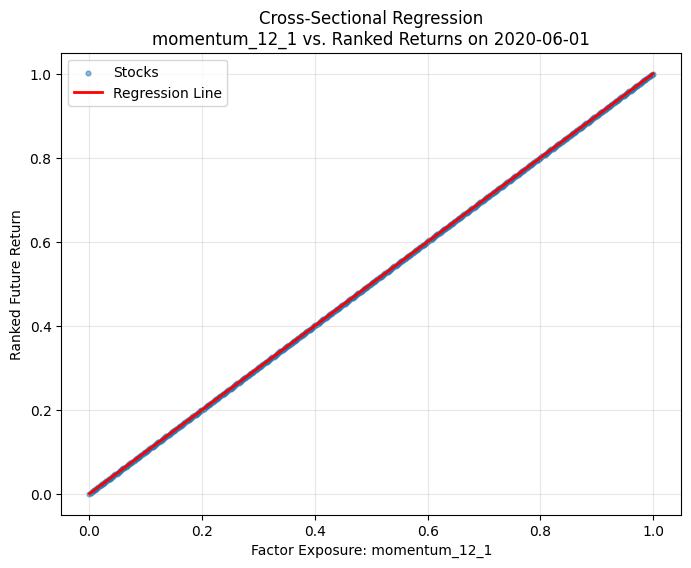

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cross_sectional_regression(date, factor_name, ranked_returns, factor_df):
    """
    Plots a scatter plot of cross-sectional ranked returns vs. one factor exposure.
    
    Parameters:
    - date (str or Timestamp): The date to plot
    - factor_name (str): Name for labeling (e.g., 'momentum_12_1')
    - ranked_returns (DataFrame): ranked returns panel
    - factor_df (DataFrame): factor exposures panel
    """

    # Extract cross-sectional data
    y = ranked_returns.loc[date]
    x = factor_df.loc[date]

    # Combine and drop missing
    df = pd.concat([x, y], axis=1, keys=["factor", "return"]).dropna()

    x_clean = df["factor"]
    y_clean = df["return"]

    # Fit simple linear regression (for visualization)
    beta, alpha = np.polyfit(x_clean, y_clean, 1)

    # Scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_clean, y_clean, alpha=0.5, s=12, label="Stocks")

    # Regression line
    x_line = np.linspace(x_clean.min(), x_clean.max(), 200)
    y_line = beta * x_line + alpha
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression Line")

    # Titles and labels
    plt.title(f"Cross-Sectional Regression\n{factor_name} vs. Ranked Returns on {date}")
    plt.xlabel(f"Factor Exposure: {factor_name}")
    plt.ylabel("Ranked Future Return")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# -----------------------------------------------------------
# Example usage: Plot for momentum_12_1 on a specific date
# -----------------------------------------------------------

DATE_TO_PLOT = "2020-06-01"

plot_cross_sectional_regression(
    date=DATE_TO_PLOT,
    factor_name="momentum_12_1",
    ranked_returns=ranked_returns,
    factor_df=momentum_12_1
)
